<a href="https://colab.research.google.com/github/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/blob/main/Project_Analysis_20_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install libraries

In [1]:
!pip install tensorflow


In [2]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [3]:
!pip install ruptures

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00


In [4]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.8 MB/s eta 0:00:00


In [5]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 8.3 MB/s eta 0:00:00


# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skewnorm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch import arch_model

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Stationarity Tests

from arch.unitroot import PhillipsPerron

from statsmodels.tsa.vector_ar.vecm import coint_johansen

from statsmodels.tsa.stattools import coint
from statsmodels.stats.diagnostic import breaks_cusumolsresid
from datetime import datetime

import ruptures as rpt


from statsmodels.tsa.api import VAR
# Import required packages
from scipy.stats import norm
from scipy.optimize import minimize, Bounds


from scipy.stats import skew, kurtosis, jarque_bera
import networkx as nx

from arch.univariate import GARCH
from arch.univariate import ConstantMean
from arch.univariate import Normal
from scipy.optimize import minimize

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from pgmpy.models.DiscreteBayesianNetwork import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination
from sklearn.preprocessing import KBinsDiscretizer

from pgmpy.estimators import MaximumLikelihoodEstimator
from statsmodels.api import OLS

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix



import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore a specific category of warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Ignore a specific warning message (can be less reliable due to potential message changes)
warnings.filterwarnings("ignore", message="Some specific message.*", category=UserWarning)

# Reset warning filters to default
# warnings.resetwarnings()

#**DATA IMPORTATION**:

In [7]:
!wget -O dataset.xlsx 'https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/dataset.xlsx'


--2025-05-20 15:33:53--  https://github.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/raw/main/dataset.xlsx
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/dataset.xlsx [following]
--2025-05-20 15:33:53--  https://raw.githubusercontent.com/MScFE-Capstone-Project-WorldQuant-Univ/Quantifying_impact_geopoliticalRisk_tradewar_environmentalShock_on_globalFinancial_commodityMarkets/main/dataset.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.19

In [8]:
# Data Extraction

# Load the cleaned Excel dataset


# Read the cleaned dataset
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])

# Parse and index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)

# Summary
print("Loaded dataset shape:", df.shape)
df

Loaded dataset shape: (420, 9)


,sp500,sp500r,lsp500,oil,oilr,gpr,twar,env,epu
date,,,,,,,,,
1990-01-31,329.079987,0.008539,5.796301,22.863182,-0.033362,81.544044,30.920652,57.681392,0.000000
1990-02-28,331.890015,0.024255,5.804804,22.113000,-0.081233,77.407211,30.685625,135.388264,0.000000
1990-03-31,339.940002,-0.026887,5.828769,20.387727,-0.101198,67.591942,36.767010,112.254839,0.000000
1990-04-30,330.799988,0.091989,5.801514,18.425500,-0.012339,81.643845,36.441399,114.704969,0.000000
1990-05-31,361.230011,-0.008886,5.889515,18.199545,-0.086273,86.407120,37.740570,93.407382,0.000000
...,...,...,...,...,...,...,...,...,...
2024-08-31,5648.399902,0.020197,8.639128,76.683182,-0.087821,140.639374,98.140496,302.748764,225.378325
2024-09-30,5762.479980,-0.009897,8.659123,70.236000,0.024597,130.074173,128.640601,155.063845,223.007104
2024-10-31,5705.450195,0.057301,8.649177,71.985000,-0.028677,130.826721,147.926890,248.148984,223.640869


#**PRELIMINARY INVESTIGATIONS:**

**Trend Analysis:**

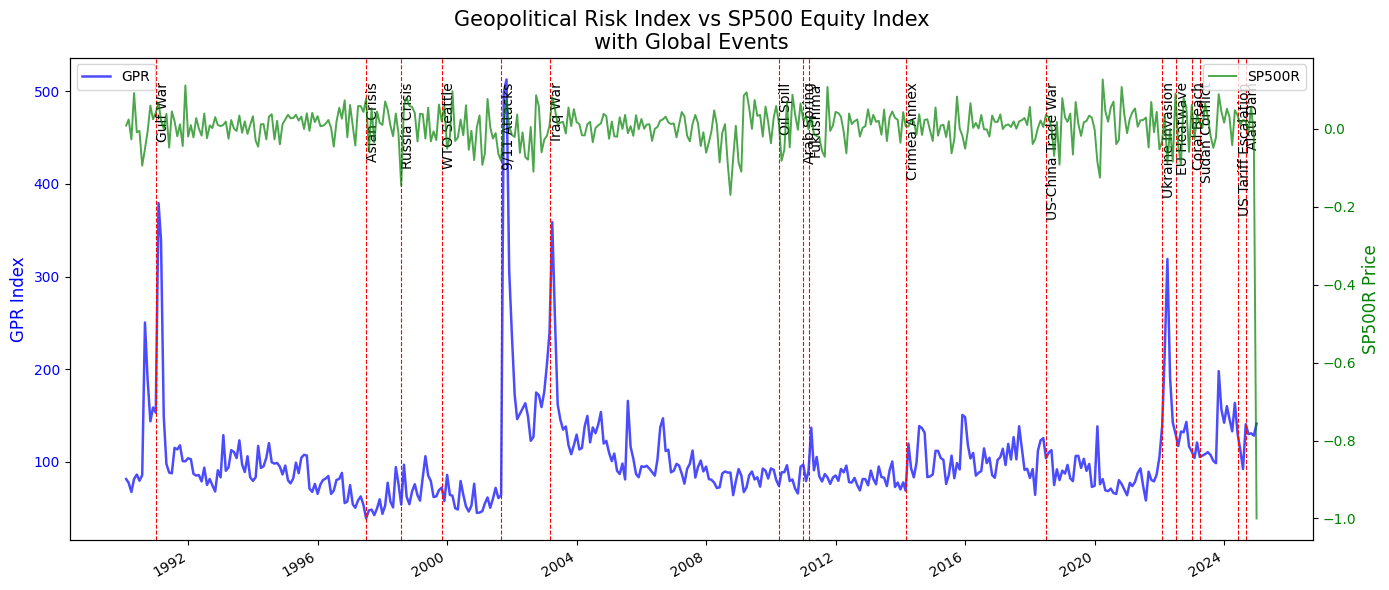

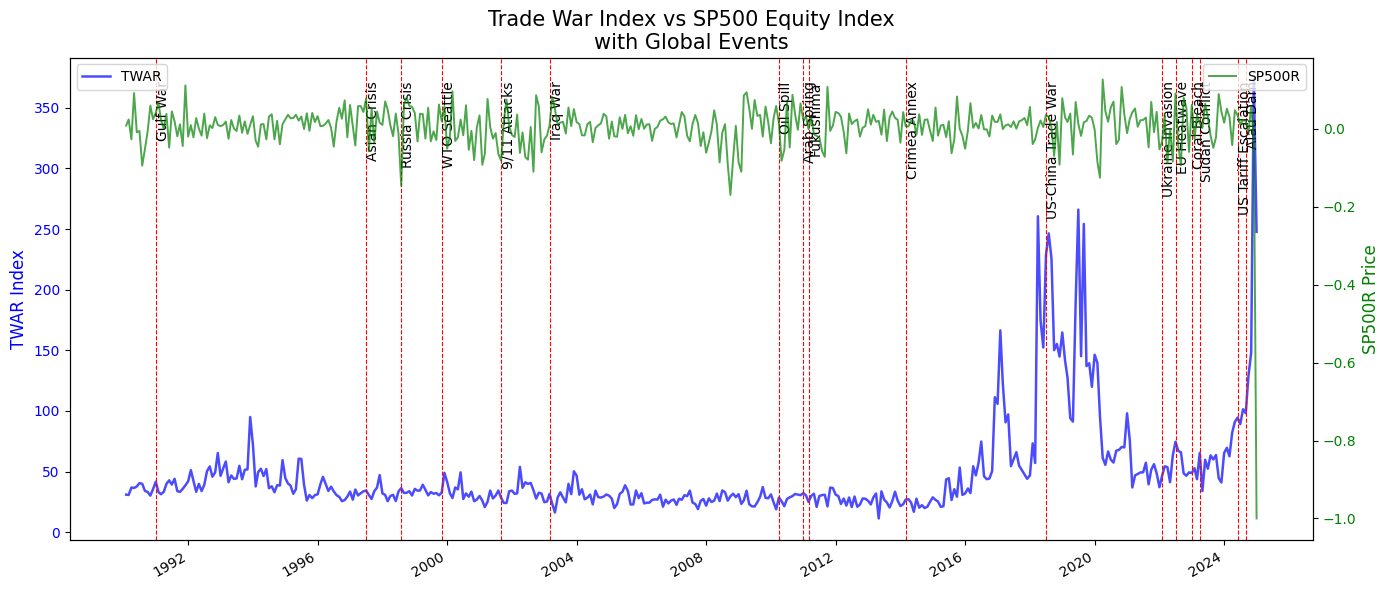

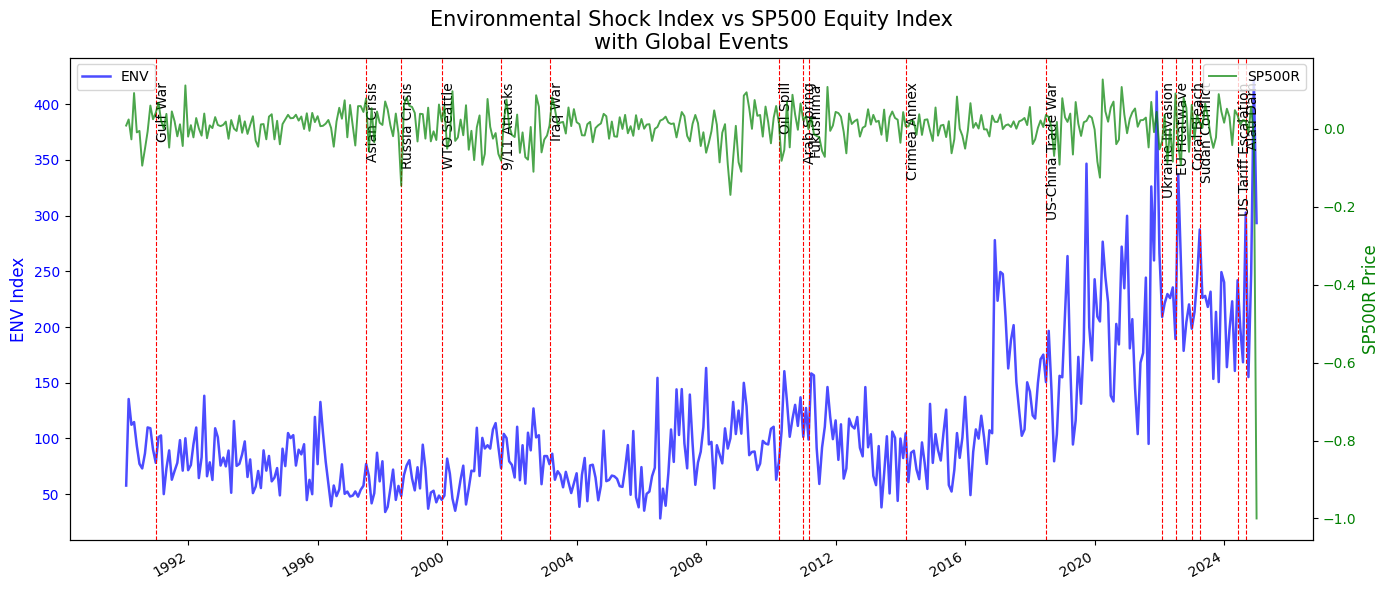

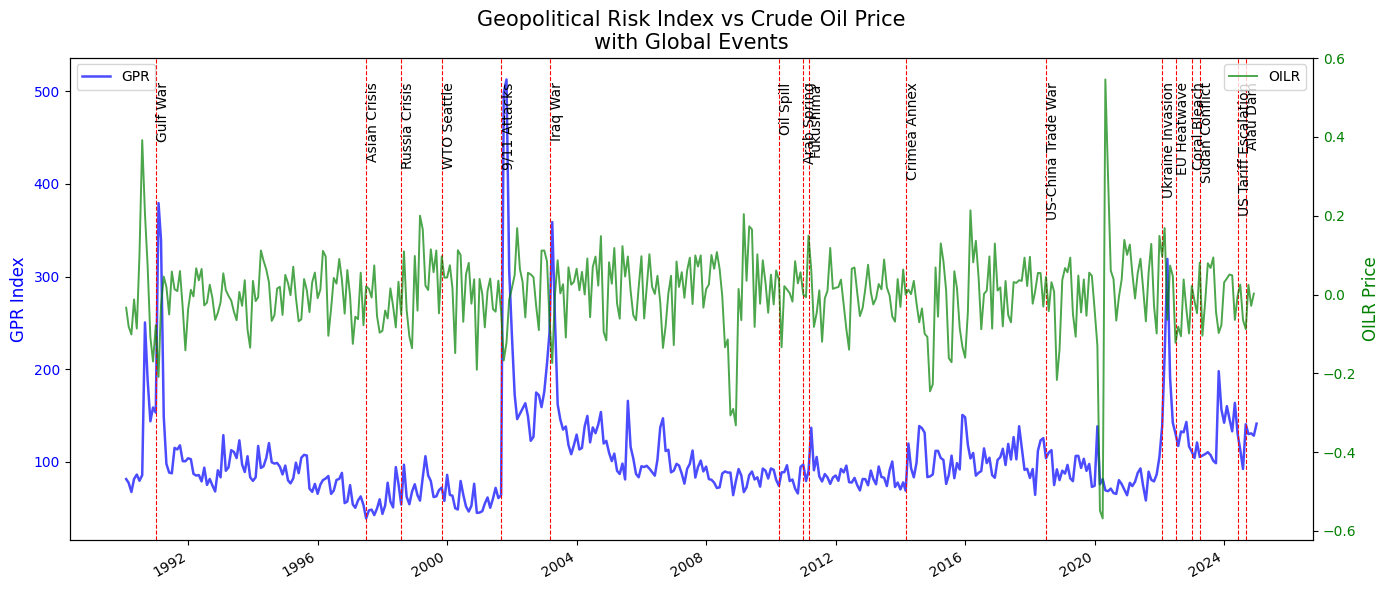

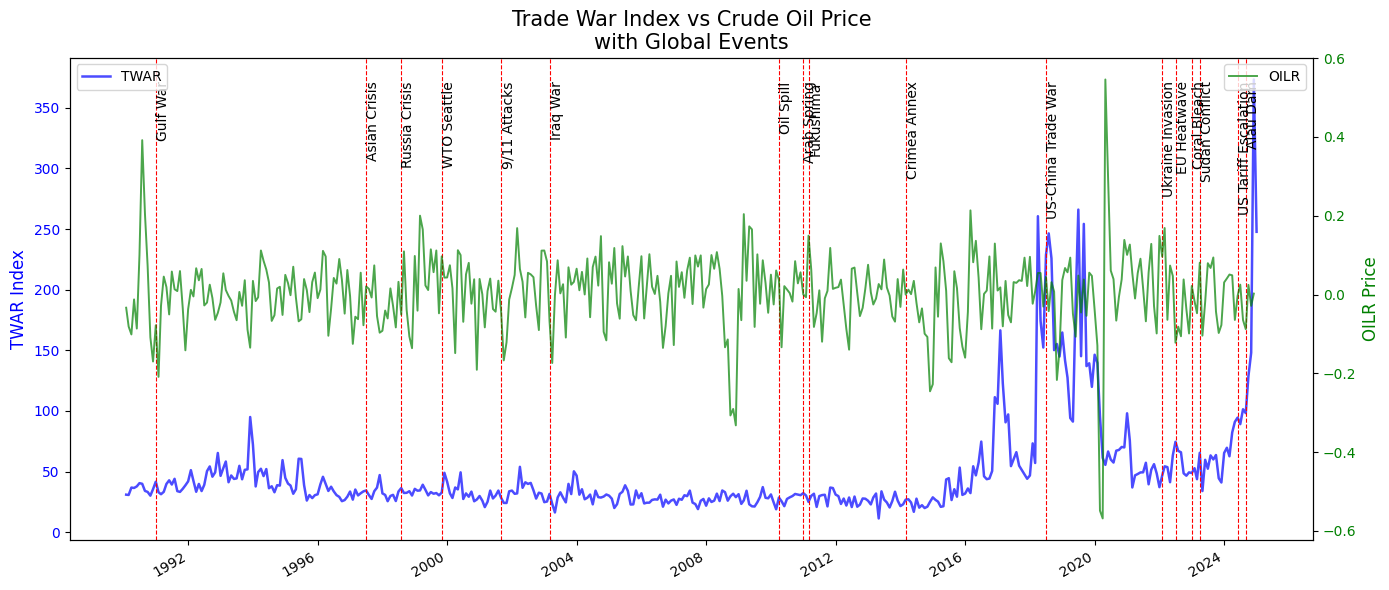

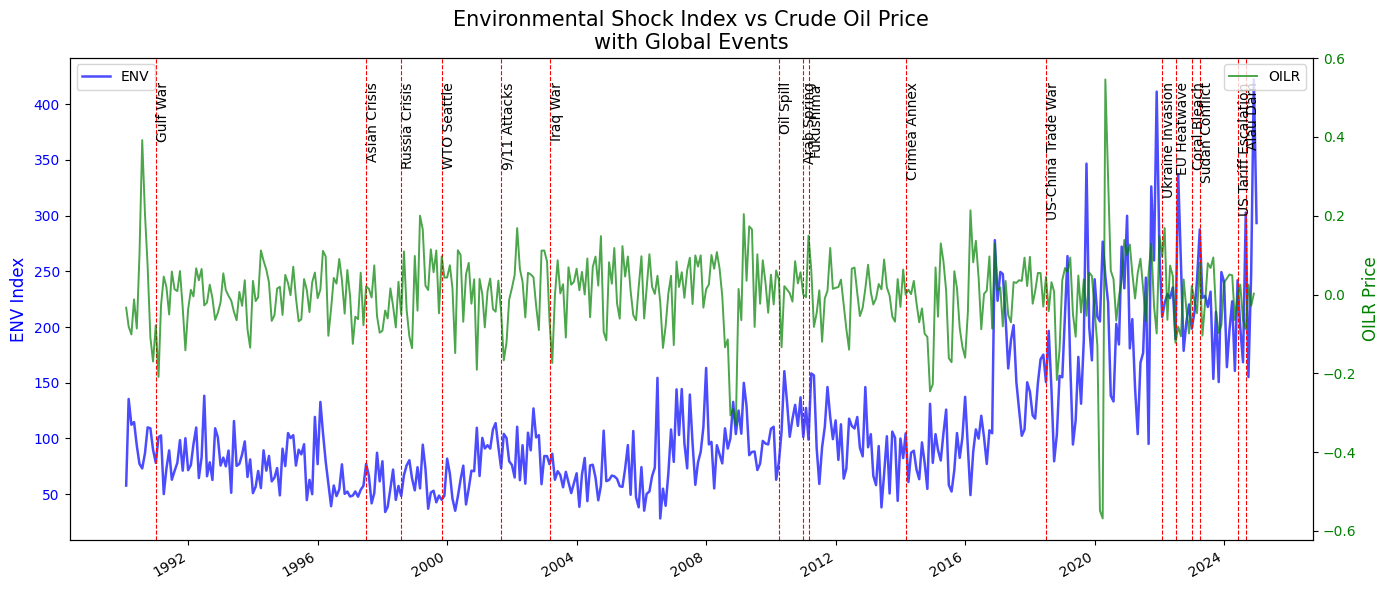

In [9]:
# Trend Analysis

# Define event timeline by category
events = {
    'Geopolitical': {
        '1991-01': "Gulf War",
        '1997-07': "Asian Crisis",
        '1998-08': "Russia Crisis",
        '2001-09': "9/11 Attacks",
        '2003-03': "Iraq War",
        '2011-01': "Arab Spring",
        '2014-03': "Crimea Annex",
        '2022-02': "Ukraine Invasion",
        '2023-04': "Sudan Conflict"
    },
    'Trade War': {
        '1999-11': "WTO Seattle",
        '2018-07': "US-China Trade War",
        '2024-06': "US Tariff Escalation"
    },
    'Environmental': {
        '2010-04': "Oil Spill",
        '2011-03': "Fukushima",
        '2022-07': "EU Heatwave",
        '2023-01': "Coral Bleach",
        '2024-09': "Alau Dam"
    }
}

# List of plots to generate
plot_pairs = [
    ('gpr', 'sp500r', 'Geopolitical Risk Index vs SP500 Equity Index'),
    ('twar', 'sp500r', 'Trade War Index vs SP500 Equity Index'),
    ('env', 'sp500r', 'Environmental Shock Index vs SP500 Equity Index'),
    ('gpr', 'oilr', 'Geopolitical Risk Index vs Crude Oil Price'),
    ('twar', 'oilr', 'Trade War Index vs Crude Oil Price'),
    ('env', 'oilr', 'Environmental Shock Index vs Crude Oil Price'),
]

# Plot the relational graphs
for x, y, title in plot_pairs:
    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Plot uncertainty index
    ax1.plot(df.index, df[x], color='blue', label=x.upper(), linewidth=1.8, alpha=0.7)
    ax1.set_ylabel(f"{x.upper()} Index", color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')

    # Twin axis for index
    ax2 = ax1.twinx()
    ax2.plot(df.index, df[y], color='green', label=y.upper(), linewidth=1.4, alpha=0.7)
    ax2.set_ylabel(f"{y.upper()} Price", color='green', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='green')

    # Annotate historical events
    for category, event_dict in events.items():
        for event_date, label in event_dict.items():
            event_date = pd.to_datetime(event_date)
            if df.index.min() <= event_date <= df.index.max():
                ax1.axvline(event_date, color='red', linestyle='--', linewidth=0.8)
                ax1.text(event_date, ax1.get_ylim()[1]*0.95, label, rotation=90,
                         fontsize=10, color='black', verticalalignment='top')

    # Title and formatting
    plt.title(f"{title}\nwith Global Events", fontsize=15)
    fig.autofmt_xdate()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

**Descriptive Analysis:**

In [10]:
# Descriptive Analysis

# Target variables
vars_list = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
desc = pd.DataFrame(index=vars_list)

# Compute descriptive statistics
desc['Mean'] = df[vars_list].mean()
desc['Median'] = df[vars_list].median()
desc['Min'] = df[vars_list].min()
desc['Max'] = df[vars_list].max()
desc['Std Dev'] = df[vars_list].std()
desc['Skewness'] = df[vars_list].apply(skew)
desc['Kurtosis'] = df[vars_list].apply(kurtosis)

# Display table
desc = desc.round(3)
print("Summary of Descriptive Statistics:\n")
display(desc)

Summary of Descriptive Statistics:



,Mean,Median,Min,Max,Std Dev,Skewness,Kurtosis
sp500r,0.005,0.012,-1.000,0.127,0.065,-8.926,134.178
oilr,0.003,0.013,-0.568,0.546,0.097,NaN,NaN
gpr,102.116,90.591,39.046,512.530,50.307,4.077,24.382
twar,47.753,33.797,11.299,373.312,41.494,3.713,17.132
env,110.680,92.249,28.162,422.187,64.243,1.663,3.064


**Correlation Analysis:**

In [11]:
# Correlation Analysis


# Select relevant columns
vars_corr = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
corr_matrix = df[vars_corr].corr().round(3)

# Print correlation matrix
print("Pearson Correlation Matrix:\n")
corr_matrix

Pearson Correlation Matrix:



,sp500r,oilr,gpr,twar,env
sp500r,1.000,0.068,0.001,-0.172,-0.084
oilr,0.068,1.000,-0.096,-0.024,-0.023
gpr,0.001,-0.096,1.000,0.025,0.098
twar,-0.172,-0.024,0.025,1.000,0.530
env,-0.084,-0.023,0.098,0.530,1.000


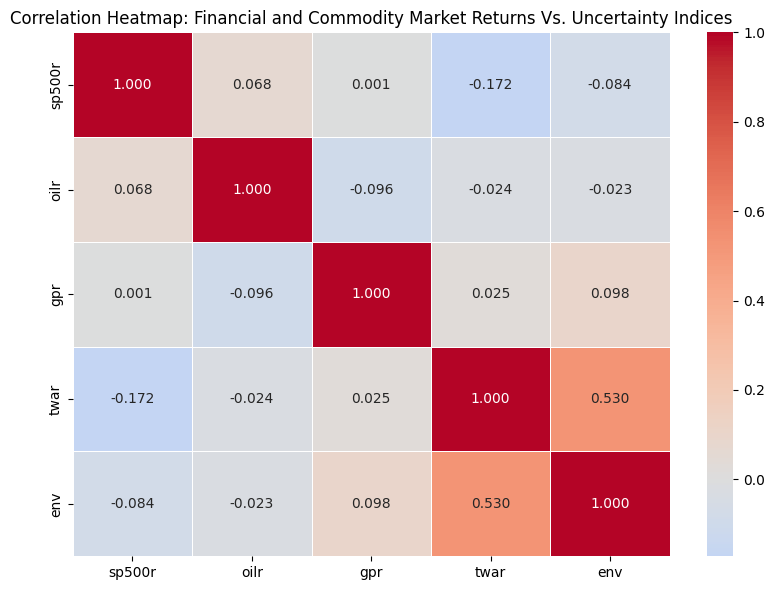

In [12]:
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, fmt=".3f")
plt.title("Correlation Heatmap: Financial and Commodity Market Returns Vs. Uncertainty Indices", fontsize=12)
plt.tight_layout()
plt.show()

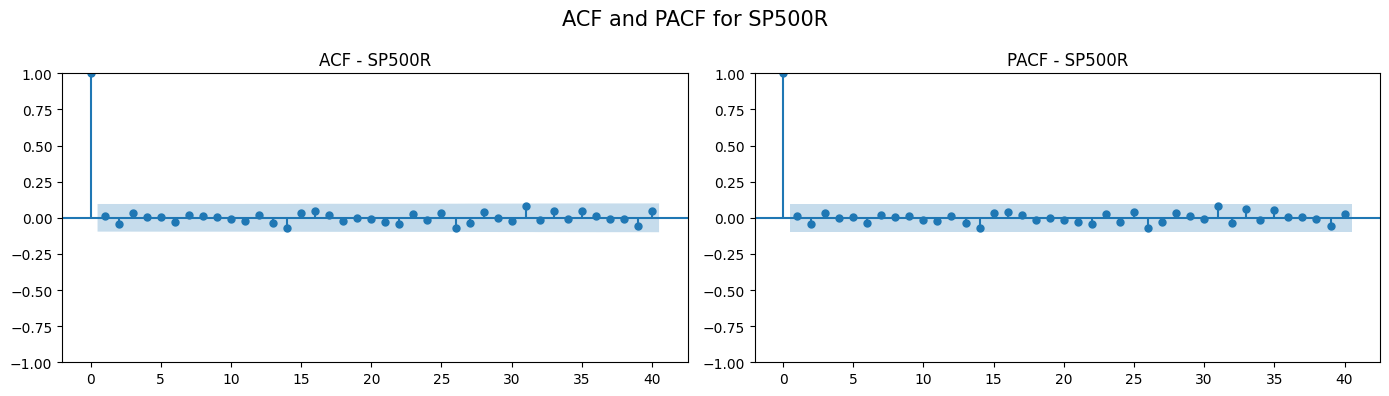

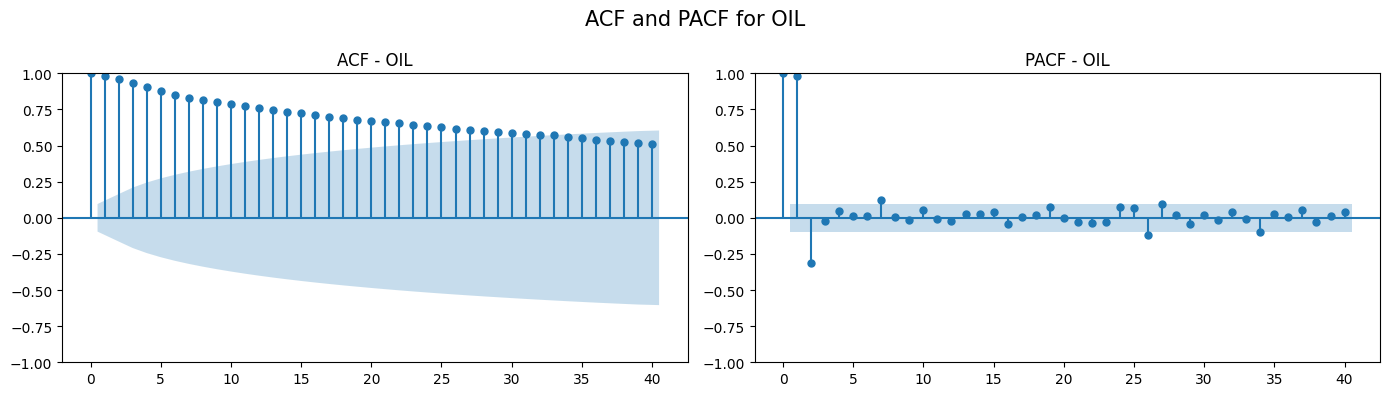

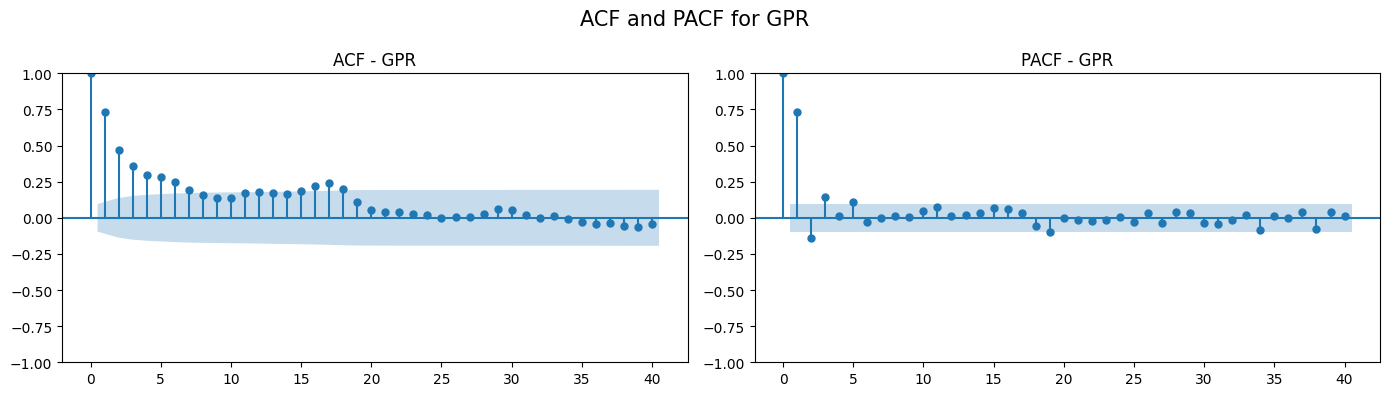

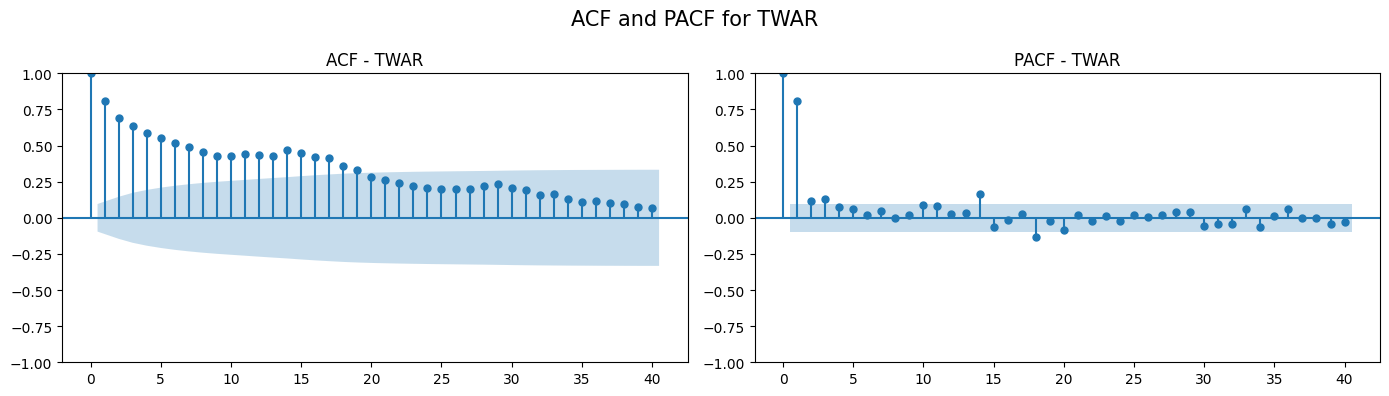

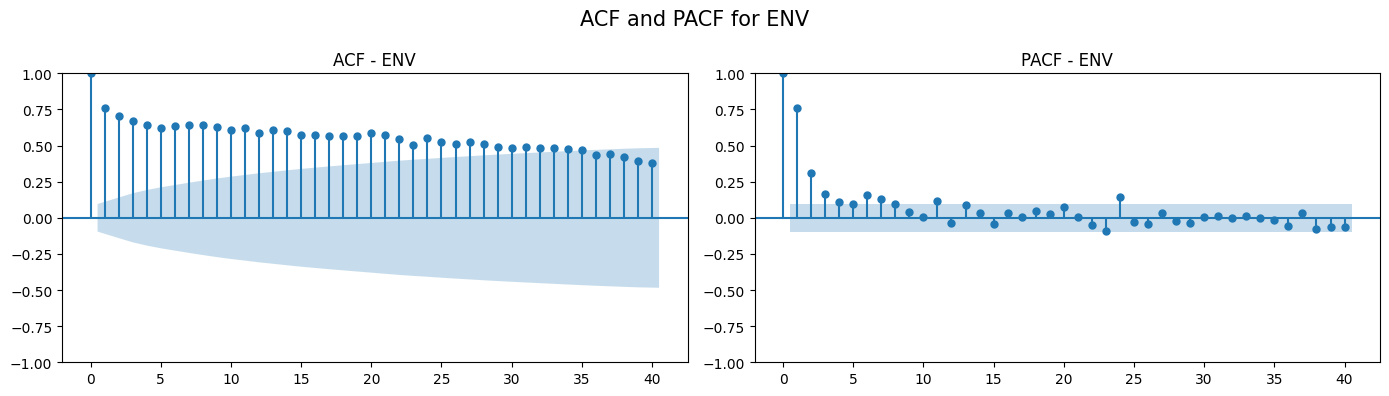

In [13]:
# Autocorrelation and Partial Autocorrelation Tests

# Plot ACF and PACF for each variabe
targets = ['sp500r', 'oil', 'gpr', 'twar', 'env']

for var in targets:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    fig.suptitle(f"ACF and PACF for {var.upper()}", fontsize=15)

    # ACF
    plot_acf(df[var], lags=40, ax=axes[0], title=f"ACF - {var.upper()}")
    # PACF
    plot_pacf(df[var], lags=40, ax=axes[1], title=f"PACF - {var.upper()}", method='ywm')

    plt.tight_layout()
    plt.show()

**Stationarity Tests:**

In [14]:
# Stationarity Tests


def stationarity_decision(p_value, alpha=0.05):
    return 'Stationary' if p_value < alpha else 'Non-Stationary'

def adf_pp_test(series, name):
    """
    Perform ADF and PP tests at level and first difference.
    Returns a dictionary with test statistics, p-values, and decisions.
    """
    results = {}

    # ADF at level
    adf_lvl = adfuller(series, regression='c', autolag='AIC')
    results['ADF Stat (Level)'] = round(adf_lvl[0], 3)
    results['ADF p-value (Level)'] = round(adf_lvl[1], 4)
    results['ADF Remark (Level)'] = stationarity_decision(adf_lvl[1])

    # ADF at first difference
    adf_diff = adfuller(series.diff().dropna(), regression='c', autolag='AIC')
    results['ADF Stat (1st Diff)'] = round(adf_diff[0], 3)
    results['ADF p-value (1st Diff)'] = round(adf_diff[1], 4)
    results['ADF Remark (1st Diff)'] = stationarity_decision(adf_diff[1])

    # PP at level
    pp_lvl = PhillipsPerron(series, trend='c', lags=4)
    results['PP Stat (Level)'] = round(pp_lvl.stat, 3)
    results['PP p-value (Level)'] = round(pp_lvl.pvalue, 4)
    results['PP Remark (Level)'] = stationarity_decision(pp_lvl.pvalue)

    # PP at first difference
    pp_diff = PhillipsPerron(series.diff().dropna(), trend='c', lags=4)
    results['PP Stat (1st Diff)'] = round(pp_diff.stat, 3)
    results['PP p-value (1st Diff)'] = round(pp_diff.pvalue, 4)
    results['PP Remark (1st Diff)'] = stationarity_decision(pp_diff.pvalue)

    return results

# Define variables to test
test_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
stationarity_full = {}

# Run stationarity tests
for var in test_vars:
    stationarity_full[var] = adf_pp_test(df[var].dropna(), var)

# Convert to structured DataFrame
stationarity_table = pd.DataFrame(stationarity_full).T
stationarity_table.index.name = 'Variable'

# Display the stationarity table
print("ADF and PP Stationarity Test Results (α = 0.05)")
display(stationarity_table)

ADF and PP Stationarity Test Results (α = 0.05)


,ADF Stat (Level),ADF p-value (Level),ADF Remark (Level),ADF Stat (1st Diff),ADF p-value (1st Diff),ADF Remark (1st Diff),PP Stat (Level),PP p-value (Level),PP Remark (Level),PP Stat (1st Diff),PP p-value (1st Diff),PP Remark (1st Diff)
Variable,,,,,,,,,,,,
sp500r,-10.171,0.0,Stationary,-5.76,0.0,Stationary,-12.794,0.0,Stationary,-25.058,0.0,Stationary
oilr,-13.755,0.0,Stationary,-8.347,0.0,Stationary,-15.074,0.0,Stationary,-34.04,0.0,Stationary
gpr,-6.802,0.0,Stationary,-8.867,0.0,Stationary,-7.834,0.0,Stationary,-21.741,0.0,Stationary
twar,-1.397,0.5839,Non-Stationary,-2.451,0.1278,Non-Stationary,-4.388,0.0003,Stationary,-29.643,0.0,Stationary
env,0.047,0.9623,Non-Stationary,-8.433,0.0,Stationary,-6.432,0.0,Stationary,-38.781,0.0,Stationary


**Cointegration Test:**

In [15]:
# Johansen Cointegration Test


# Variables to test
johansen_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
joh_data = df[johansen_vars].dropna()

# Johansen test (det_order = -1: automatically select)
joh_result = coint_johansen(joh_data, det_order=0, k_ar_diff=2)

# Trace statistic and critical values
trace_stat = joh_result.lr1
trace_cv = joh_result.cvt

# Max eigenvalue statistic and critical values
maxeig_stat = joh_result.lr2
maxeig_cv = joh_result.cvm

# Compile results into structured DataFrame
johansen_df = pd.DataFrame({
    'Rank (r)': [f"r ≤ {i}" for i in range(len(trace_stat))],
    'Trace Statistic': np.round(trace_stat, 3),
    'Trace CV (5%)': trace_cv[:, 1],
    'Trace Result': ['Reject' if stat > cv else 'Do Not Reject'
                     for stat, cv in zip(trace_stat, trace_cv[:, 1])],
    'MaxEig Statistic': np.round(maxeig_stat, 3),
    'MaxEig CV (5%)': maxeig_cv[:, 1],
    'MaxEig Result': ['Reject' if stat > cv else 'Do Not Reject'
                      for stat, cv in zip(maxeig_stat, maxeig_cv[:, 1])]
})

print("Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)")
display(johansen_df)

Johansen Cointegration Results (Trace and Max Eigenvalue - 5% level)


,Rank (r),Trace Statistic,Trace CV (5%),Trace Result,MaxEig Statistic,MaxEig CV (5%),MaxEig Result
0,r ≤ 0,339.534,69.8189,Reject,151.096,33.8777,Reject
1,r ≤ 1,188.438,47.8545,Reject,114.408,27.5858,Reject
2,r ≤ 2,74.030,29.7961,Reject,47.861,21.1314,Reject
3,r ≤ 3,26.169,15.4943,Reject,25.296,14.2639,Reject
4,r ≤ 4,0.873,3.8415,Do Not Reject,0.873,3.8415,Do Not Reject


In [16]:
# Engle-Granger Linear Cointegration Test


# Define pairwise combinations
eg_pairs = [
    ('sp500r', 'gpr'),
    ('sp500r', 'twar'),
    ('sp500r', 'env'),
    ('oilr', 'gpr'),
    ('oilr', 'twar'),
    ('oilr', 'env'),
]

eg_results = []

# Loop through each pair
for y, x in eg_pairs:
    aligned_data = df[[y, x]].dropna()
    coint_result = coint(aligned_data[y], aligned_data[x])
    test_stat, p_value, _ = coint_result
    eg_results.append({
        'Dependent': y,
        'Independent': x,
        'Test Statistic': round(test_stat, 3),
        'p-value': round(p_value, 4),
        'Result': 'Cointegrated' if p_value < 0.05 else 'Not Cointegrated'
    })

# Convert to DataFrame
eg_df = pd.DataFrame(eg_results)
print("Engle-Granger Cointegration Results (5% Level)")
display(eg_df)

Engle-Granger Cointegration Results (5% Level)


,Dependent,Independent,Test Statistic,p-value,Result
0,sp500r,gpr,-10.209,0.0,Cointegrated
1,sp500r,twar,-8.404,0.0,Cointegrated
2,sp500r,env,-10.606,0.0,Cointegrated
3,oilr,gpr,-13.711,0.0,Cointegrated
4,oilr,twar,-13.792,0.0,Cointegrated
5,oilr,env,-13.768,0.0,Cointegrated


**Structural Break Test:**

In [17]:
# Chow Single Break Test for Model 1 (Financial Market) and Model 2 (Commodity Market)


def chow_test(df, yvar, xvars, break_date_str):
    """
    Performs Chow test at a known break date.
    """
    break_date = pd.to_datetime(break_date_str)
    data = df[[yvar] + xvars].dropna()

    # Split data into pre-break and post-break samples
    pre = data[data.index < break_date]
    post = data[data.index >= break_date]

    # Prepare regression variables
    X_pre = sm.add_constant(pre[xvars])
    y_pre = pre[yvar]
    X_post = sm.add_constant(post[xvars])
    y_post = post[yvar]

    # Regressions
    model_full = sm.OLS(data[yvar], sm.add_constant(data[xvars])).fit()
    model_pre = sm.OLS(y_pre, X_pre).fit()
    model_post = sm.OLS(y_post, X_post).fit()

    # Chow F-test calculation
    RSS_full = sum(model_full.resid ** 2)
    RSS_pre = sum(model_pre.resid ** 2)
    RSS_post = sum(model_post.resid ** 2)

    k = len(xvars) + 1  # number of parameters
    n_pre = len(pre)
    n_post = len(post)
    n_total = n_pre + n_post

    F_chow = ((RSS_full - (RSS_pre + RSS_post)) / k) / ((RSS_pre + RSS_post) / (n_total - 2 * k))

    return {
        'Break Date': break_date_str,
        'F-statistic': round(F_chow, 3),
        'Decision (5%)': 'Structural Break' if F_chow > 3 else 'No Break'
    }

# Define Chow test breakpoints
break_dates = ['2001-09-11', '2022-02-24']  # 9/11 and Ukraine Invasion

# Test SP500R and OILR around these dates
chow_results = []

for date in break_dates:
    chow_results.append({**chow_test(df, 'sp500r', ['gpr', 'twar', 'env'], date), 'Variable': 'sp500r'})
    chow_results.append({**chow_test(df, 'oilr', ['gpr', 'twar', 'env'], date), 'Variable': 'oilr'})

# Display results
chow_df = pd.DataFrame(chow_results)[['Variable', 'Break Date', 'F-statistic', 'Decision (5%)']]
print("Chow Structural Break Results")
display(chow_df)

Chow Structural Break Results


,Variable,Break Date,F-statistic,Decision (5%)
0,sp500r,2001-09-11,0.211,No Break
1,oilr,2001-09-11,0.562,No Break
2,sp500r,2022-02-24,13.673,Structural Break
3,oilr,2022-02-24,0.144,No Break



Bai-Perron Structural Breakpoints for SP500R
Detected Break Dates:
 - 2008-08
 - 2009-02
 - 2020-01
 - 2020-03
 - 2024-11


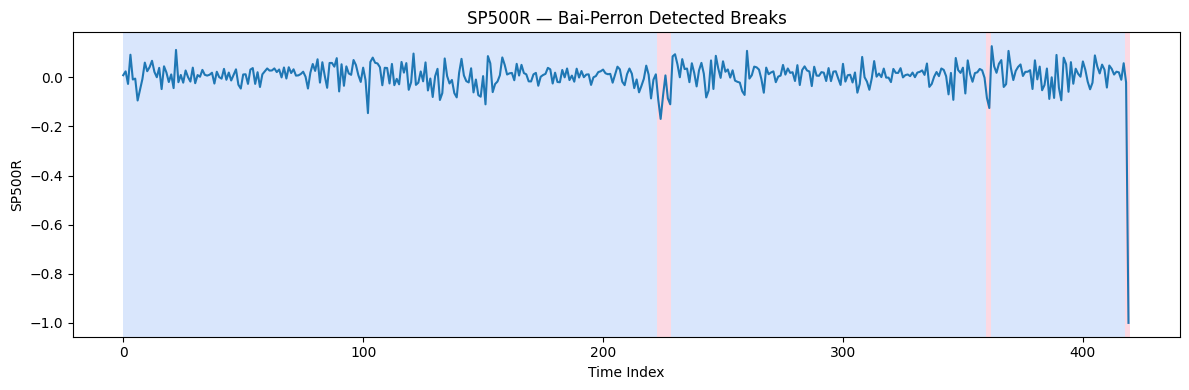


Bai-Perron Structural Breakpoints for OILR
Detected Break Dates:
 - 2008-09
 - 2008-12
 - 2020-02
 - 2020-04
 - 2020-06


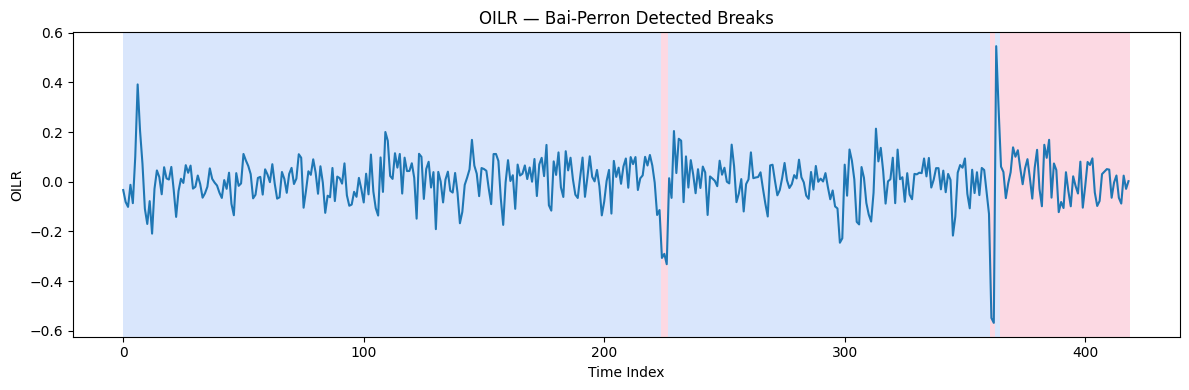

In [18]:
# Bai-Perron Multiple Break test for Model 1 (Financial Market) and Model 2 (Commodity Market)


def bai_perron_breaks(series, model="l2", penalty='bic', max_bkps=5):
    """
    Applies Bai-Perron break detection via 'ruptures'.
    """
    algo = rpt.KernelCPD(kernel="linear").fit(series.values.reshape(-1, 1))
    breakpoints = algo.predict(n_bkps=max_bkps)
    return breakpoints

# Run Bai-Perron on SP500 and OIL returns
for var in ['sp500r', 'oilr']:
    print(f"\nBai-Perron Structural Breakpoints for {var.upper()}")
    series = df[var].dropna()
    bkps = bai_perron_breaks(series)
    break_dates = series.index[bkps[:-1]]  # exclude final dummy break
    print("Detected Break Dates:")
    for date in break_dates:
        print(" -", date.strftime('%Y-%m'))

    # Plot
    rpt.display(series.values, bkps, figsize=(12, 4))
    plt.title(f"{var.upper()} — Bai-Perron Detected Breaks")
    plt.xlabel("Time Index")
    plt.ylabel(var.upper())
    plt.tight_layout()
    plt.show()

**Lag Selection Test:**

In [19]:
# Lag selection test


# Target variables
lag_vars = ['sp500r', 'oilr', 'gpr', 'twar', 'env']
lag_data = df[lag_vars].dropna()

# Fit the VAR model and determine optimal lag up to 5
var_model = VAR(lag_data)
lag_selection = var_model.select_order(maxlags=5)

# Extract results as a DataFrame
lag_summary = pd.DataFrame({
    'Lag': range(1, 6),
    'AIC': lag_selection.aic,
    'BIC': lag_selection.bic,
    'HQIC': lag_selection.hqic
}).set_index('Lag')

# Identify optimal lags for each criterion
optimal_lags = {
    'AIC': lag_summary['AIC'].idxmin(),
    'BIC': lag_summary['BIC'].idxmin(),
    'HQIC': lag_summary['HQIC'].idxmin()
}

# Display lag selection table
print("Lag Selection Table (Lags 1 to 5):")
display(lag_summary.round(3))

# Show optimal lag summary
print("\nOptimal Lag Based on Criteria:")
for criterion, opt_lag in optimal_lags.items():
    print(f" - {criterion}: {opt_lag} lags")

Lag Selection Table (Lags 1 to 5):


,AIC,BIC,HQIC
Lag,,,
1,3,1,2
2,3,1,2
3,3,1,2
4,3,1,2
5,3,1,2



Optimal Lag Based on Criteria:
 - AIC: 1 lags
 - BIC: 1 lags
 - HQIC: 1 lags


#**MODEL ESTIMATIONS FOR THE STUDY'S OBJECTIVES AND HYPOTHESES:**

**Hypothesis 1: MS-GARCH - Financial Market Model**

In [20]:

# Financial Market Model
df = pd.read_excel('dataset.xlsx', parse_dates=['date'])
df.set_index('date', inplace=True)
returns = df['sp500r'].dropna().values  # Use SP500 returns
T = len(returns)

# Initialize regimes and parameters
k = 2  # Number of regimes
S = np.zeros((T, k))        # State probabilities
loglik = []                 # Log-likelihood trace
tol = 1e-5                  # Convergence tolerance
max_iter = 300              # Max EM iterations
np.random.seed(42)          # Reproducibility

# Transition matrix P initialization
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial GARCH parameters by regime: (omega, alpha, beta, mu)
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0},
    1: {'omega': 0.02, 'alpha': 0.2, 'beta': 0.7, 'mu': 0.0}
}

# Initial variances for each regime
sigma2 = np.full((T, k), 0.02)
gamma = np.full((T, k), 1/k)  # Initial state probability: uniform

print("Initialization complete.")

Initialization complete.


In [21]:
# Expected Maximization Algorithm for MS-GARCH(1,1)


def garch_likelihood(params_vec, r, sigma2_init):
    omega, alpha, beta, mu = params_vec
    T = len(r)
    sigma2 = np.zeros(T)
    ll = 0.0
    sigma2[0] = sigma2_init

    for t in range(1, T):
        sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
        ll += np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t]

    return 0.5 * ll

def update_garch_params(r, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta, mu = params_vec
        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0
        for t in range(1, T):
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1]
            ll += gamma_col[t] * (np.log(2*np.pi*sigma2[t]) + (r[t] - mu)**2 / sigma2[t])
        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0], [1.0, 1.0, 1.0, 5.0])
    init = [0.01, 0.1, 0.85, 0.0]
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x

# Start EM Algorithm
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (returns[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s]

        # Compute conditional density for each regime
        likelihood = np.array([
            norm.pdf(returns[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        # Transition-weighted prediction
        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Compute total log-likelihood
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))  # Stability with epsilon

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Update GARCH Parameters
    gamma_sum = np.sum(gamma, axis=0)
    for s in range(k):
        p_opt = update_garch_params(returns, gamma[:, s], sigma2[0, s])
        params[s] = dict(zip(['omega', 'alpha', 'beta', 'mu'], p_opt))

    # M-STEP: Update Transition Matrix
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(returns[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"EM algorithm converged at iteration {iteration} — Log-likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nFinal Estimated Parameters (Regime-wise):")
for s in range(k):
    print(f"Regime {s+1}: ω={params[s]['omega']:.4f}, α={params[s]['alpha']:.4f}, β={params[s]['beta']:.4f}, μ={params[s]['mu']:.4f}")

print("\nFinal Transition Matrix (P):")
print(np.round(P, 4))


Final Estimated Parameters (Regime-wise):
Regime 1: ω=0.0001, α=0.2018, β=0.7192, μ=0.0099
Regime 2: ω=0.0001, α=0.2236, β=0.7397, μ=0.0080

Final Transition Matrix (P):
[[9.999e-01 1.000e-04]
 [5.000e-04 9.995e-01]]


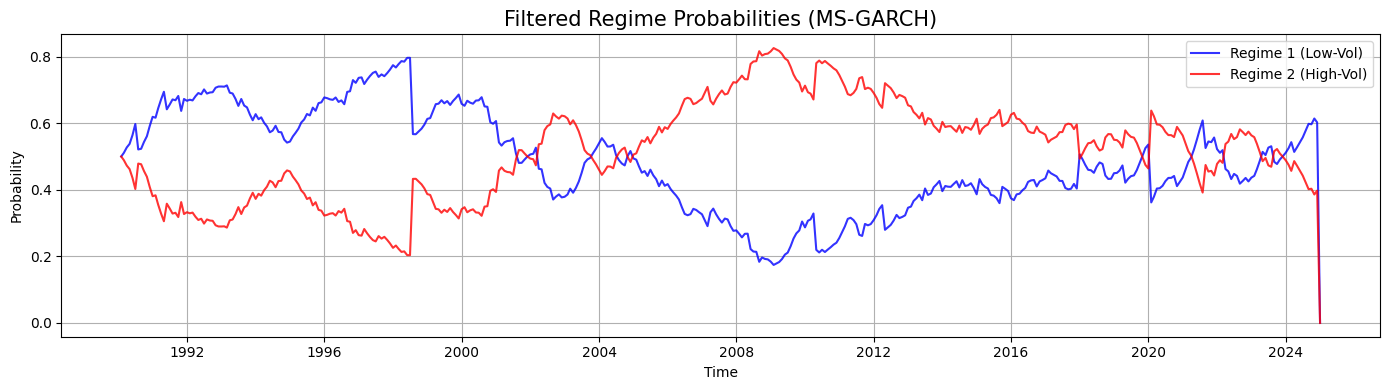

In [22]:
# Plot filtered regime probabilities

#import matplotlib.pyplot as plt

# Create a DataFrame for plotting
gamma_df = pd.DataFrame(gamma, columns=['Regime 1', 'Regime 2'])
gamma_df['Date'] = df.index[:T]
gamma_df.set_index('Date', inplace=True)

# Plot filtered probabilities
plt.figure(figsize=(14, 4))
plt.plot(gamma_df['Regime 1'], label='Regime 1 (Low-Vol)', color='blue', alpha=0.8)
plt.plot(gamma_df['Regime 2'], label='Regime 2 (High-Vol)', color='red', alpha=0.8)
plt.title("Filtered Regime Probabilities (MS-GARCH)", fontsize=15)
plt.ylabel("Probability")
plt.xlabel("Time")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


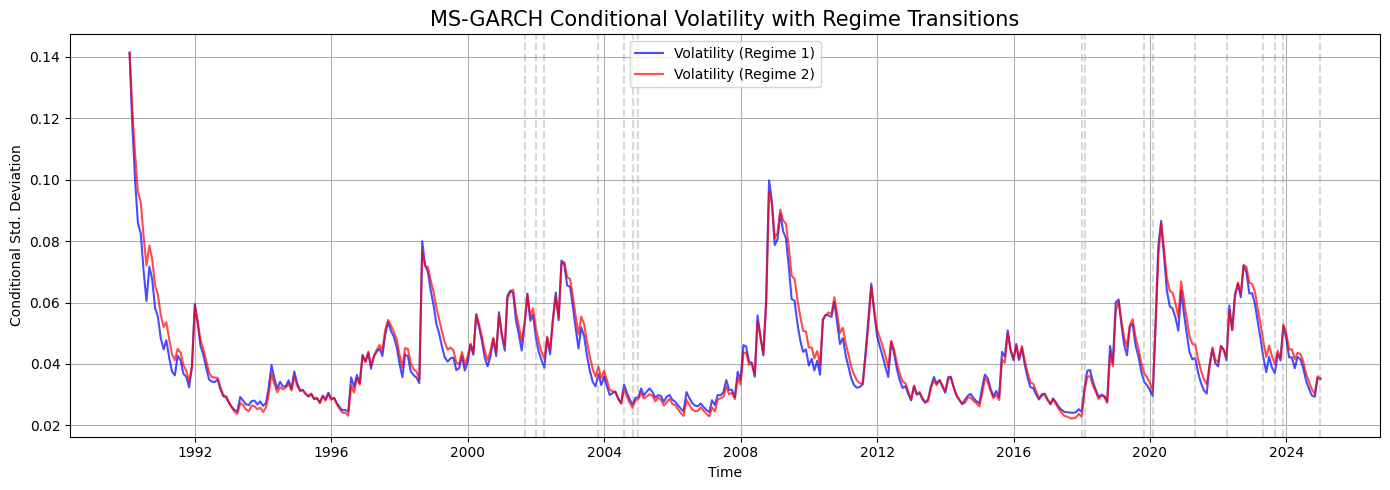

In [23]:
# Volatility and Regime Annotation Plot

# Assign regime with maximum probability
most_likely_regime = np.argmax(gamma, axis=1)
regime_series = pd.Series(most_likely_regime, index=df.index[:T])

# Plot conditional volatility with regime colors
plt.figure(figsize=(14, 5))
plt.plot(df.index[:T], np.sqrt(sigma2[:, 0]), label='Volatility (Regime 1)', color='blue', alpha=0.7)
plt.plot(df.index[:T], np.sqrt(sigma2[:, 1]), label='Volatility (Regime 2)', color='red', alpha=0.7)

# Regime shading
for t in range(1, T):
    if regime_series.iloc[t] != regime_series.iloc[t-1]:
        plt.axvline(x=regime_series.index[t], color='gray', linestyle='--', alpha=0.3)

plt.title("MS-GARCH Conditional Volatility with Regime Transitions", fontsize=15)
plt.ylabel("Conditional Std. Deviation")
plt.xlabel("Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Estimated MS-GARCH Summary Table

params_table = pd.DataFrame(params).T
params_table.columns = ['omega', 'alpha', 'beta', 'mu']
params_table.index = [f'Regime {i+1}' for i in range(k)]
params_table = params_table.round(4)

print("MS-GARCH Estimated Parameters (Regime-wise):")
display(params_table)

print("\nEstimated Transition Probability Matrix (P):")
P_df = pd.DataFrame(P, columns=['To Regime 1', 'To Regime 2'], index=['From Regime 1', 'From Regime 2'])
display(P_df.round(4))

MS-GARCH Estimated Parameters (Regime-wise):


,omega,alpha,beta,mu
Regime 1,0.0001,0.2018,0.7192,0.0099
Regime 2,0.0001,0.2236,0.7397,0.0080



Estimated Transition Probability Matrix (P):


,To Regime 1,To Regime 2
From Regime 1,0.9999,0.0001
From Regime 2,0.0005,0.9995


**Regime-Dependent with External Shocks: Financial Market**

In [25]:
# Financial Market Regime-dependent Volatility with External Shocks (GDP, TWAR, and ENV)

# Load the dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Define target variables
r = df["sp500r"].dropna().values  # SP500 returns
X = df[["gpr", "twar", "env"]].dropna().values  # Independent shock variables

# Ensure r and X are aligned
min_len = min(len(r), len(X))
r = r[-min_len:]
X = X[-min_len:]
T, k = len(r), 2  # T: time periods, k: number of regimes
m = X.shape[1]    # number of external variables

# Initialize parameters for each regime
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},
    1: {'omega': 0.02, 'alpha': 0.15, 'beta': 0.7, 'mu': 0.0, 'delta': np.array([0.05, 0.05, 0.05])}
}

# Transition matrix
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])

# Initial regime probabilities
gamma = np.full((T, k), 1 / k)
sigma2 = np.full((T, k), 0.02)
loglik = []
max_iter = 300
tol = 1e-5

print("MS-GARCH-X initialization complete.")


MS-GARCH-X initialization complete.


In [26]:
# Expected Maximization Algorithm with External Shocks

# Function to estimate regime-specific GARCH-X parameters with shocks
def update_garchx_params(r, X, gamma_col, sigma2_init):
    def weighted_nll(params_vec):
        omega, alpha, beta = params_vec[:3]
        mu = params_vec[3]
        delta = params_vec[4:]

        T = len(r)
        sigma2 = np.zeros(T)
        sigma2[0] = sigma2_init
        ll = 0.0

        for t in range(1, T):
            x_term = np.dot(delta, X[t])
            sigma2[t] = omega + alpha * (r[t-1] - mu)**2 + beta * sigma2[t-1] + x_term
            sigma2[t] = max(sigma2[t], 1e-8)  # avoid negative variance
            ll += gamma_col[t] * (np.log(2 * np.pi * sigma2[t]) + (r[t] - mu)**2 / sigma2[t])

        return 0.5 * ll

    bounds = Bounds([1e-6, 0.0, 0.0, -5.0] + [-1.0] * m, [1.0, 1.0, 1.0, 5.0] + [1.0] * m)
    init = [0.01, 0.1, 0.85, 0.0] + [0.01] * m
    result = minimize(weighted_nll, init, bounds=bounds, method='L-BFGS-B')
    return result.x


# EM Algorithm Loop
for iteration in range(max_iter):
    # E-STEP: Forward Filtering
    for t in range(1, T):
        for s in range(k):
            mu_s = params[s]['mu']
            delta_s = params[s]['delta']
            x_term = np.dot(delta_s, X[t])
            sigma2[t, s] = params[s]['omega'] + params[s]['alpha'] * (r[t-1] - mu_s)**2 + params[s]['beta'] * sigma2[t-1, s] + x_term
            sigma2[t, s] = max(sigma2[t, s], 1e-8)

        likelihood = np.array([
            norm.pdf(r[t], loc=params[s]['mu'], scale=np.sqrt(sigma2[t, s]))
            for s in range(k)
        ])

        weights = P.T @ gamma[t-1]
        numer = likelihood * weights
        denom = np.sum(numer)
        gamma[t] = numer / (denom + 1e-12)

    # Log-likelihood computation
    ll_terms = []
    for t in range(1, T):
        joint_prob_sum = np.sum([
            gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
            for i in range(k) for j in range(k)
        ])
        ll_terms.append(np.log(joint_prob_sum + 1e-12))

    ll_value = np.sum(ll_terms)
    loglik.append(ll_value)

    # M-STEP: Parameter Updates
    for s in range(k):
        opt = update_garchx_params(r, X, gamma[:, s], sigma2[0, s])
        params[s]['omega'] = opt[0]
        params[s]['alpha'] = opt[1]
        params[s]['beta'] = opt[2]
        params[s]['mu'] = opt[3]
        params[s]['delta'] = np.array(opt[4:])

    # M-STEP: Transition Matrix Update
    trans_counts = np.zeros((k, k))
    for t in range(1, T):
        for i in range(k):
            for j in range(k):
                p_ij = gamma[t-1, i] * P[i, j] * norm.pdf(r[t], loc=params[j]['mu'], scale=np.sqrt(sigma2[t, j]))
                trans_counts[i, j] += p_ij

    P = trans_counts / trans_counts.sum(axis=1, keepdims=True)

    # Convergence Check
    if iteration > 2 and abs(loglik[-1] - loglik[-2]) < tol:
        print(f"MS-GARCH-X EM algorithm converged at iteration {iteration}, Log-Likelihood: {loglik[-1]:.4f}")
        break

# Final output
print("\nFinal Estimated Parameters (Regime-wise with shock impacts):")
for s in range(k):
    print(f"\nRegime {s+1}:")
    print(f"ω={params[s]['omega']:.5f}, α={params[s]['alpha']:.5f}, β={params[s]['beta']:.5f}, μ={params[s]['mu']:.5f}")
    print(f"δ (impact of GPR, TWAR, ENV): {np.round(params[s]['delta'], 5)}")

print("\nFinal Transition Matrix (P):")
print(np.round(P, 4))

MS-GARCH-X EM algorithm converged at iteration 3, Log-Likelihood: -966.7022

Final Estimated Parameters (Regime-wise with shock impacts):

Regime 1:
ω=0.01000, α=0.10000, β=0.85000, μ=0.00000
δ (impact of GPR, TWAR, ENV): [0.01 0.01 0.01]

Regime 2:
ω=0.01000, α=0.10000, β=0.85000, μ=0.00000
δ (impact of GPR, TWAR, ENV): [0.01 0.01 0.01]

Final Transition Matrix (P):
[[0.972  0.028 ]
 [0.0886 0.9114]]


In [27]:
# Load dataset
df = pd.read_excel("dataset.xlsx", parse_dates=["date"])
df.set_index("date", inplace=True)
df.sort_index(inplace=True)

# Define model inputs
# Dependent variable: SP500 return
r = df["sp500r"].dropna().values

# Independent variables: GPR, TWAR, ENV
X = df[["gpr", "twar", "env"]].dropna().values

# Ensure alignment between r and X
min_len = min(len(r), len(X))
r = r[-min_len:]
X = X[-min_len:]

# Set key dimensions
T = len(r)        # number of time steps
k = 2             # number of regimes (high/low volatility)
m = X.shape[1]    # number of independent regressors (3)

# Initialize regime-specific parameters
params = {
    0: {'omega': 0.01, 'alpha': 0.1, 'beta': 0.8, 'mu': 0.0, 'delta': np.array([0.01, 0.01, 0.01])},  # stable regime
    1: {'omega': 0.02, 'alpha': 0.15, 'beta': 0.7, 'mu': 0.0, 'delta': np.array([0.05, 0.05, 0.05])}  # crisis regime
}

# Initialize transition matrix
P = np.array([[0.95, 0.05],
              [0.05, 0.95]])  # rows sum to 1

# Initialize gamma (state probabilities) and volatility
gamma = np.full((T, k), 1 / k)   # uniform initial probabilities
sigma2 = np.full((T, k), 0.02)   # constant starting variance
loglik = []                      # for likelihood tracking

# EM control settings
max_iter = 300
tol = 1e-5

# Initialization complete
print("MS-GARCH-X initialization complete.")

MS-GARCH-X initialization complete.


In [39]:
df.describe()

,sp500,sp500r,lsp500,oil,oilr,gpr,twar,env,epu
count,420.000000,420.000000,420.000000,420.000000,419.000000,420.000000,420.000000,420.000000,420.000000
mean,1699.361783,0.005433,7.186799,51.096725,0.002675,102.115528,47.752831,110.680450,114.962675
std,1258.219554,0.065059,0.718596,29.283683,0.096558,50.306958,41.494335,64.243430,89.546358
min,304.000000,-1.000000,5.717028,11.347273,-0.568191,39.045624,11.299124,28.161927,0.000000
25%,915.707504,-0.017722,6.819697,22.174628,-0.048522,78.107361,28.258176,67.131555,61.307354
50%,1282.769958,0.011705,7.156777,47.881364,0.012594,90.591480,33.796984,92.248778,101.341959
75%,2100.105103,0.034765,7.649742,74.217049,0.056328,111.968145,49.267429,131.050647,166.169238
max,6032.379883,0.126844,8.704897,133.880000,0.545852,512.529724,373.312153,422.186810,431.571593


**Hypothesis 2A: DCC-GARCH**

Data used for Dynamic Conditional Correlation estimation:
              sp500r      oilr       gpr      twar       env
date                                                        
1990-02-28  1.043973  0.889894 -0.052063 -0.007630  0.853212
1990-07-31  2.893529  1.364139  0.073840 -0.013597 -0.054894
1990-08-31 -0.611199 -0.649819  1.071391 -0.158879  0.170020
1990-09-30 -2.033592 -1.032739 -0.283314 -0.024492  0.238031
1990-11-30 -0.881285  0.447841  0.098501  0.163496 -0.193026

Data shape: (136, 5)
Univariate GARCH Results for sp500r:
Univariate GARCH Results for oilr:
Univariate GARCH Results for gpr:
Univariate GARCH Results for twar:
Univariate GARCH Results for env:
Standardized Residuals Stats:
           sp500r        oilr         gpr        twar         env
count  136.000000  136.000000  136.000000  136.000000  136.000000
mean    -0.000085   -0.001059    0.017609   -0.006248    0.004906
std      1.014224    0.994542    1.031655    0.991808    1.007386
min     -3.726996   -3.4

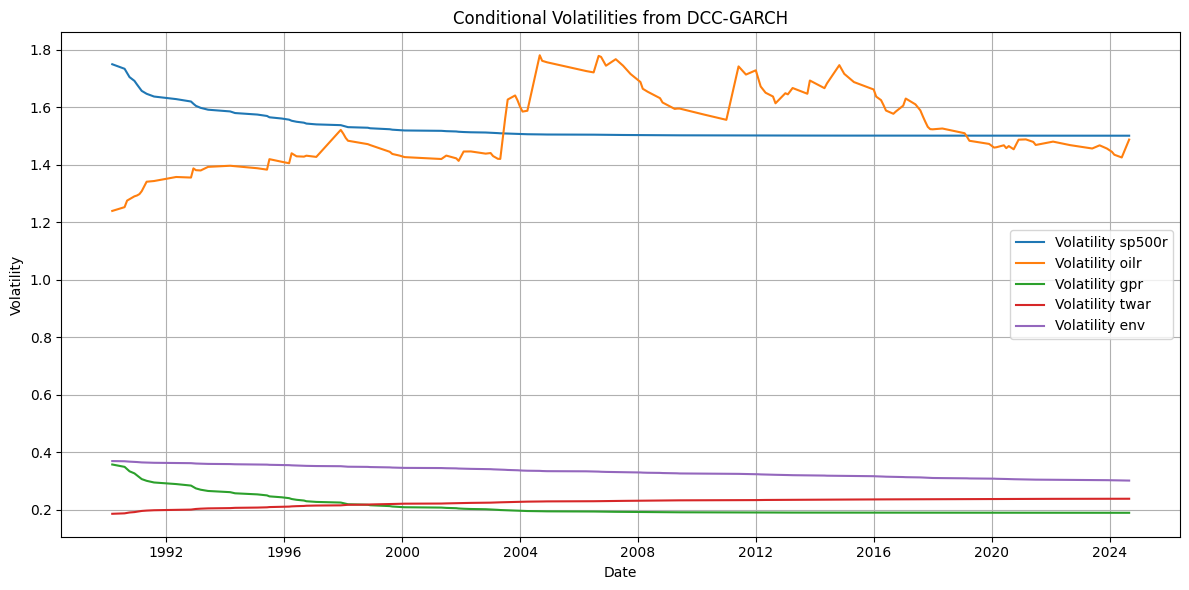

In [52]:
def estimate_dcc_garch(returns, p=1, q=1, garch_order=(1, 1), dist='normal'):
    """
    Estimates a DCC-GARCH model for multivariate returns.

    Args:
        returns (pd.DataFrame): DataFrame of returns for multiple assets.
        p (int): Order of the ARCH term in the DCC model.
        q (int): Order of the GARCH term in the DCC model.
        garch_order (tuple): Order (p, q) of the univariate GARCH model for each asset.
        dist (str): Distribution to use for the univariate GARCH models ('normal' or 't').

    Returns:
        dict: A dictionary containing the estimated parameters and other results.
    """
    num_assets = returns.shape[1]
    asset_names = returns.columns
    n = returns.shape[1]

    # 1. Univariate GARCH Estimation
    univariate_garch_results = {}
    conditional_volatility = pd.DataFrame(index=returns.index)
    standardized_residuals = pd.DataFrame(index=returns.index)

    for asset in asset_names:
        am = arch_model(returns[asset], mean='Constant', vol='GARCH', p=garch_order[0], q=garch_order[1], dist=dist)
        res = am.fit(disp='off')
        univariate_garch_results[asset] = res
        conditional_volatility[asset] = res.conditional_volatility
        # Calculate standardized residuals: resid / conditional_volatility
        standardized_residuals[asset] = res.resid / res.conditional_volatility


        print(f"Univariate GARCH Results for {asset}:")
        #print(res.summary()) # Commented out for cleaner output during the optimization

    print("Standardized Residuals Stats:")
    print(standardized_residuals.describe())

    # Convert standardized_residuals DataFrame to NumPy array for faster numerical operations
    standardized_residuals_np = standardized_residuals.values

    # 2. DCC Parameter Estimation (manual likelihood optimization)
    def dcc_likelihood(params, standardized_residuals_np, p, q):
        """
        Calculates the negative log-likelihood of the DCC(p, q) model.

        Args:
            params (np.ndarray): A 1-D array of DCC parameters.
                Order: [alpha_off_diag_elements_Rbar, a_diag_elements_A, b_diag_elements_B]
                - alpha_off_diag_elements_Rbar: Lower/Upper triangular off-diagonal elements of Rbar (vectorized).
                - a_diag_elements_A: Diagonal elements of the ARCH-like parameter matrix (A).
                - b_diag_elements_B: Diagonal elements of the GARCH-like parameter matrix (B).
            standardized_residuals_np (np.ndarray): T x n array of standardized residuals
                from the univariate GARCH models.
            p (int): Order of the ARCH-like term in DCC. (Assumed to be 1 here for simplicity)
            q (int): Order of the GARCH-like term in DCC. (Assumed to be 1 here for simplicity)

        Returns:
            float: The negative log-likelihood value.
        """
        T, n = standardized_residuals_np.shape

        num_off_diag_Rbar = n * (n - 1) // 2
        # Ensure the number of parameters matches the expected count based on this assumption
        # n*(n-1)/2 (off-diags of Rbar) + n (diags of A) + n (diags of B)
        expected_params = num_off_diag_Rbar + n + n

        if len(params) != expected_params:
            print(f"Error: Parameter count mismatch in likelihood. Expected {expected_params}, got {len(params)}")
            return np.inf # Return infinite likelihood


        # Extract parameters
        # The order of parameters in `initial_params` needs to match this extraction
        alpha_off_diag = params[:num_off_diag_Rbar]
        a = params[num_off_diag_Rbar : num_off_diag_Rbar + n]
        b = params[num_off_diag_Rbar + n : ] # Slice to the end

        # Ensure parameters are non-negative (soft constraint via penalty)
        # A and B parameters must be non-negative. Correlation parameters should be between -1 and 1.
        if np.any(a < 0) or np.any(b < 0):
             #print("Parameter 'a' or 'b' is negative.")
             return np.inf  # Return infinite likelihood for invalid parameters

        # Ensure stationarity-like condition (a + b < 1 element-wise)
        if np.any(a + b >= 1):
            #print("Stationarity condition (a+b >= 1) violated in likelihood.")
            return np.inf

        # Ensure correlation parameters are within (-1, 1)
        if np.any(alpha_off_diag <= -1) or np.any(alpha_off_diag >= 1):
            #print("Correlation parameter outside (-1, 1).")
            return np.inf


        # 1. Construct Rbar (constant conditional correlation matrix)
        Rbar = np.eye(n)
        k = 0
        # Fill the upper triangle (excluding diagonal) and copy to lower triangle
        for i in range(n):
            for j in range(i + 1, n):
                Rbar[i, j] = alpha_off_diag[k]
                Rbar[j, i] = alpha_off_diag[k] # Rbar is symmetric
                k += 1

        # Ensure Rbar is positive definite (soft constraint)
        try:
            np.linalg.cholesky(Rbar)
        except np.linalg.LinAlgError:
            #print("Rbar is not positive definite.")
            return np.inf

        # Calculate (I - A - B) * Rbar term once (assuming A and B are diagonal matrices represented by their diagonals)
        # I - A - B is a diagonal matrix with elements (1 - a_i - b_i)
        I_minus_A_minus_B = np.diag(1 - a - b) @ Rbar

        # 2. Initialize Q_t and Rt
        Q = np.zeros((T, n, n))
        Rt = np.zeros((T, n, n))

        initial_Q = np.cov(standardized_residuals_np, rowvar=False)

        # Ensure initial_Q is positive definite
        try:
             np.linalg.cholesky(initial_Q)
        except np.linalg.LinAlgError:
             #print("Initial Q (sample covariance) is not positive definite.")
             return np.inf

        # Initialize Q[0] using the recursive formula or sample covariance
        # Let's initialize Q[0] using the sample covariance of the first few observations, or a constant value like the identity matrix or Rbar.
        # Using Rbar as initial Q[0] is common.
        Q[0] = Rbar # Or use initial_Q or np.cov(standardized_residuals_np[:some_window], rowvar=False)


        # Calculate initial R[0]
        try:
            # Use np.sqrt for element-wise square root on the diagonal array
            diag_Q0_inv_sqrt = np.diag(1 / np.sqrt(np.diag(Q[0])))
            Rt[0] = diag_Q0_inv_sqrt @ Q[0] @ diag_Q0_inv_sqrt
            np.linalg.cholesky(Rt[0]) # Ensure positive definite
        except (np.linalg.LinAlgError, ValueError) as e: # Catch ValueError for sqrt(negative)
            #print(f"Initial Rt not positive definite or diagonal elements of Q[0] non-positive: {e}")
            return np.inf

        # Calculate initial log-likelihood contribution
        try:
            loglik = -0.5 * (n * np.log(2 * np.pi) + np.log(np.linalg.det(Rt[0])) +
                            standardized_residuals_np[0, :] @ np.linalg.inv(Rt[0]) @ standardized_residuals_np[0, :])
        except np.linalg.LinAlgError:
            #print("Could not calculate initial log-likelihood (matrix inversion error).")
            return np.inf


        # 3. Iterate through time to calculate Q_t and Rt and the likelihood
        # Ensure p and q orders are handled correctly in the loop
        for t in range(1, T):
            # Calculate the innovation term (z_t z_t')
            innov_t = standardized_residuals_np[t, :, np.newaxis] @ standardized_residuals_np[t, np.newaxis, :]


            # Need to handle p and q lags:
            innov_lag_p = standardized_residuals_np[t-p, :, np.newaxis] @ standardized_residuals_np[t-p, np.newaxis, :] if t >= p else initial_Q # Use initial Q or Rbar for pre-sample values
            Q_lag_q = Q[t-q] if t >= q else initial_Q # Use initial Q or Rbar for pre-sample values


            # Let's correct the indexing for `standardized_residuals_np`.
            innov_lag_p = standardized_residuals_np[t-p, :].reshape(-1, 1) @ standardized_residuals_np[t-p, :].reshape(1, -1) if t >= p else initial_Q
            Q_lag_q = Q[t-q] if t >= q else initial_Q

            Q[t] = I_minus_A_minus_B + np.diag(a) @ innov_lag_p + np.diag(b) @ Q_lag_q


            # Calculate R_t
            try:
                # Use np.sqrt for element-wise square root on the diagonal array
                diag_Qt_inv_sqrt = np.diag(1 / np.sqrt(np.diag(Q[t])))
                Rt[t] = diag_Qt_inv_sqrt @ Q[t] @ diag_Qt_inv_sqrt
                np.linalg.cholesky(Rt[t]) # Ensure positive definite
            except (np.linalg.LinAlgError, ValueError) as e: # Catch ValueError for sqrt(negative)
                #print(f"Rt not positive definite or diagonal elements of Q[t] non-positive at time {t}: {e}")
                return np.inf

            # Calculate log-likelihood contribution
            try:
                 loglik += -0.5 * (n * np.log(2 * np.pi) + np.log(np.linalg.det(Rt[t])) +
                                 standardized_residuals_np[t, :] @ np.linalg.inv(Rt[t]) @ standardized_residuals_np[t, :])
            except np.linalg.LinAlgError:
                #print(f"Could not calculate log-likelihood at time {t} (matrix inversion error).")
                return np.inf


        return -loglik # Return negative log-likelihood for minimization

    # Initial parameter guesses
    # Ensure the number of initial parameters matches the number expected by the likelihood function
    n = standardized_residuals.shape[1]
    num_off_diag_Rbar = n * (n - 1) // 2 # Number of unique off-diagonal elements in Rbar

    # Initial guess for the unique off-diagonal elements of Rbar (correlations)
    # Can use sample correlations as initial guess
    sample_corr = standardized_residuals.corr().values
    initial_alpha = sample_corr[np.triu_indices(n, k=1)] # Get upper triangle off-diagonal elements


    initial_a = np.full(n, 0.01) # Initial guess for diagonal elements of A
    initial_b = np.full(n, 0.90) # Initial guess for diagonal elements of B

    initial_params = np.concatenate([initial_alpha, initial_a, initial_b])

    print(f"Number of assets (n): {n}")
    print(f"Number of off-diagonal Rbar elements: {num_off_diag_Rbar}")
    print(f"Expected number of parameters: {num_off_diag_Rbar + n + n}")
    print(f"Initial parameters shape: {initial_params.shape}")


    # Optimization
    ##bounds = [(-0.999, 0.999)] * num_off_diag_Rbar + \
      #       [(1e-6, 1 - 1e-6)] * n + \
       #      [(1e-6, 1 - 1e-6)] * n # Ensure a_i + b_i < 1 and > 0


    bounds = [(-0.999, 0.999)] * num_off_diag_Rbar + \
             [(1e-6, None)] * n + \
             [(1e-6, None)] * n # Bounds: correlations (-1, 1), a > 0, b > 0

    dcc_opt_results = minimize(dcc_likelihood, initial_params,
                               args=(standardized_residuals_np, p, q),
                               method='L-BFGS-B', bounds=bounds,
                               options={'disp': True, 'maxiter': 1000, 'ftol': 1e-6, 'gtol': 1e-6}) # Added options for display and limits


    estimated_params = dcc_opt_results.x

    # Extract estimated DCC parameters
    estimated_alpha = estimated_params[:num_off_diag_Rbar]
    estimated_a = estimated_params[num_off_diag_Rbar : num_off_diag_Rbar + n]
    estimated_b = estimated_params[num_off_diag_Rbar + n : ]

    print("\nEstimated DCC Parameters:")
    print("Alpha (Off-diagonals of Rbar):", estimated_alpha)
    print("A (Diagonal elements):", estimated_a)
    print("B (Diagonal elements):", estimated_b)
    print("\nOptimization Results:", dcc_opt_results)
    print("\nLikelihood at minimum:", -dcc_opt_results.fun)

    if not dcc_opt_results.success:
        print("\nWarning: Optimization did not converge successfully.")


    # Construct the estimated Rbar matrix
    Rbar_est = np.eye(n)
    k = 0
    for i in range(n):
        for j in range(i + 1, n):
            Rbar_est[i, j] = estimated_alpha[k]
            Rbar_est[j, i] = estimated_alpha[k]
            k += 1

    print("\nEstimated Rbar (Constant Conditional Correlation Matrix):")
    print(Rbar_est)

    # 3. Construct the time-varying conditional correlation matrix (Rt) using estimated parameters
    T = standardized_residuals_np.shape[0]
    Q_t = np.zeros((T, n, n))
    Rt_est = np.zeros((T, n, n))

    # Use the estimated Rbar and parameters to initialize Q[0] or use initial_Q from optimization
    # Re-calculate I_minus_A_minus_B with estimated parameters
    I_minus_A_minus_B_est = (np.eye(n) - np.diag(estimated_a) - np.diag(estimated_b)) @ Rbar_est

    # Initial Q[0] - can use Rbar_est or re-calculate based on sample covariance if needed,
    # but using Rbar_est is common after parameters are estimated.
    Q_t[0] = Rbar_est # Or use the initial_Q from the likelihood function if that was more robust

    # Re-calculate initial R[0] based on the estimated Q[0]
    try:
         diag_Q0_inv_sqrt = np.diag(1 / np.sqrt(np.diag(Q_t[0])))
         Rt_est[0] = diag_Q0_inv_sqrt @ Q_t[0] @ diag_Q0_inv_sqrt
    except (np.linalg.LinAlgError, ValueError) as e:
         print(f"Error calculating initial Rt_est: {e}")
         # Handle or return None/error indicator if initial calculation fails


    for t in range(1, T):
        # Calculate the innovation term (z_t z_t')
        innov_t = standardized_residuals_np[t, :].reshape(-1, 1) @ standardized_residuals_np[t, :].reshape(1, -1)

        # Calculate the Q_t recursion using estimated parameters
        # Q_t = (I - diag(a) - diag(b)) Rbar + diag(a) @ innov_t_minus_p + diag(b) @ Q_t_minus_q
        # For DCC(1,1):
        innov_lag_1 = standardized_residuals_np[t-1, :].reshape(-1, 1) @ standardized_residuals_np[t-1, :].reshape(1, -1)
        Q_lag_1 = Q_t[t-1]

        Q_t[t] = I_minus_A_minus_B_est + np.diag(estimated_a) @ innov_lag_1 + np.diag(estimated_b) @ Q_lag_1

        # Calculate R_t
        try:
            # Use np.sqrt for element-wise square root on the diagonal array
            diag_Qt_inv_sqrt = np.diag(1 / np.sqrt(np.diag(Q_t[t])))
            Rt_est[t] = diag_Qt_inv_sqrt @ Q_t[t] @ diag_Qt_inv_sqrt
        except (np.linalg.LinAlgError, ValueError) as e:
            print(f"Error calculating Rt_est at time {t}: {e}")
            # If a matrix is not positive definite, the correlation matrix might not be well-defined.
            Rt_est[t] = Rt_est[t-1] if t > 0 else np.eye(n) # Fallback to previous or identity


    # Store conditional correlation matrices in a dictionary with dates as keys
    conditional_correlations = {date: corr_matrix for date, corr_matrix in zip(returns.index, Rt_est)}


    results = {
        'univariate_garch_results': univariate_garch_results,
        'estimated_alpha': estimated_alpha,
        'estimated_a': estimated_a,
        'estimated_b': estimated_b,
        'Rbar': Rbar_est,
        'conditional_volatilities': conditional_volatility,
        'conditional_correlations': conditional_correlations,
        'dcc_optimization_results': dcc_opt_results
    }

    return results

if __name__ == '__main__':
    # Load and prepare the data as done in the notebook context

    df1=df[['sp500r',	'oilr',	'gpr',	'twar'	,'env']]

    # Calculate log returns and drop the first row (NaN)
    # Ensure no zeros or negatives before log transformation

    # Apply log transformation
    dflog = np.log((df1 / df1.shift(1)).dropna()).dropna()


    # Check for NaNs again just in case, although dropna should handle the initial row
    if dflog.isnull().any().any():
         print("Warning: NaNs found in returnfilter after dropna. Review data or imputation.")
         # If there are NaNs mid-series, simple mean imputation might not be ideal for time series.

    print("Data used for Dynamic Conditional Correlation estimation:")
    print(dflog.head())
    print("\nData shape:", dflog.shape)

    # Estimate the DCC-GARCH model
    # Ensure 'Normal' is correctly capitalized if using 'arch' library's distribution names
    # 'arch' uses 'Normal' or 'StudentsT'
    dcc_results = estimate_dcc_garch(dflog, p=1, q=1, garch_order=(1, 1), dist='Normal')

    asset_names=list(dflog.columns)


    if dcc_results:
        # Access the results
        print("\n--- DCC-GARCH Results ---")
        print("\nConditional Volatilities:")
        print(dcc_results['conditional_volatilities'].head())


        # Plot conditional volatilities
        plt.figure(figsize=(12, 6))
        # Ensure columns in conditional_volatilities match the assets
        for asset in dcc_results['conditional_volatilities'].columns:
            plt.plot(dcc_results['conditional_volatilities'].index, dcc_results['conditional_volatilities'][asset], label=f'Volatility {asset}')
        plt.title('Conditional Volatilities from DCC-GARCH')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Condition volatilies from DCC-Garch shows that Commodity Market returns were more volatile than Global Financial Market and risk factors.

Conditional Correlation Matrices

In [29]:
events_env = {
    'Environmental event': {
        '1991-01-31': 'Somalia drought',
        '2003-08-31': 'Europe HeatWave',
        '2005-08-31':'Hurricane Katrina',
        '2010-03-31': "Oil Spill",
        '2010-04-30':'Deepwater Horizon oil',
        '2010-08-31':'heatwave in Russia',
        '2011-03-31':'Fukushima disaster',
        '2011-07-31': 'Somalia famine',
        '2013-11-30':'Typhoon Haiyan',
        '2022-07-31': "EU Heatwave",
        '2023-01-31': "Coral Bleach",
        '2024-09-30': "Alau Dam"
    }
}
events_gpr = {
    'Geopolitical events': {
        '1990-08-31':'invasion of Kuwait',
        '1991-02-28':'liberation of Kuwait',
        '1991-12-31':'URSS dissolution',
        '1992-04-30':'Bosnia War Start',
        '1994-04-30':'Rwandan Genocide',
        '1995-12-31':'Dayton Accords',
        '1997-07-31': "Asian Crisis",
        '1998-02-28':'Kosovo war',
        '1998-08-31': "Russia Crisis",
        '2001-09-31':'9/11 US terrorist attack',
        '2003-03-31': "Iraq War",
        '2008-09-30':'Global Financial Crisis',
        '2011-01-31': "Arab Spring",
        '2011-03-31':'Syrian Civil war',
        '2014-03-31': 'Crimea Annex',
        '2020-04-30': 'COVID-19 pandemic',
        '2022-02-31': "Ukraine Invasion",
        '2023-04-30': "Sudan Conflict"

    }
}
events_twar = {

    'Trade War event': {
        '1992-12-31':'NAFTA agreement',
        '1993-12-31':'NAFTA Act law',
        '1999-11-30': "WTO Seattle",
        '2001-12-31':'China into WTO',
        '2008-09-30':'Global Financial Crisis',
        '2018-01-31':'US-China War',
        '2018-07-31': "US-China Trade War",
        '2020-03-31':'Oil Price Crash',
          '2024-06-30': "US Tariff Escalation"
    }}
gpr=pd.DataFrame(events_gpr)
twar=pd.DataFrame(events_twar)
env=pd.DataFrame(events_env)
gpr_date=[str(date).split(' ')[0] for date in list(events_gpr['Geopolitical events'].keys())]
twar_date=[str(date).split(' ')[0] for date in list(events_twar['Trade War event'].keys())]
env_date=[str(date).split(' ')[0] for date in list(events_env['Environmental event'].keys())]



for var in ['sp500r','oilr']:
    for c in ['gpr','twar','env']:
        # Load and prepare the data as done in the notebook context

        df1=df[[var,c]]
        dlog=df1
        # Calculate log returns and drop the first row (NaN)

        # Apply log transformation
        dflog = np.log(df1 / df1.shift(1)).dropna()

        # Estimate the DCC-GARCH model

        dcc_results=estimate_dcc_garch(dflog, p=1, q=1, garch_order=(1, 1), dist='Normal')

        asset_names=list(dflog.columns)

        # Access the results
        series=[]

        print("\nConditional Correlation Matrices:")

        dcc_dict={}
        # Iterate and print the correlation matrices
        for i, (date, corr_matrix) in enumerate(dcc_results['conditional_correlations'].items()):

            dcc_dict[str(date).split(' ')[0]]=corr_matrix

        if c=='gpr':

            for d in gpr_date:

                i=dcc_dict.get(d)
                if i is None:
                    series.append(i)
                else:
                    series.append(i[0][1])
        elif c=='twar':

            for d in twar_date:

                i=dcc_dict.get(d)
                if i is None:
                    series.append(i)
                else:
                    series.append(i[0][1])
        elif c=='env':

            for d in env_date:

                i=dcc_dict.get(d)
                if i is None:
                    series.append(i)
                else:
                    series.append(i[0][1])

        if c=='gpr':

            gpr[f'rho({var},{c})']=series
        elif  c=='twar':
            twar[f'rho({var},{c})']=series
        elif  c=='env':
            env[f'rho({var},{c})']=series


Univariate GARCH Results for sp500r:
Univariate GARCH Results for gpr:
Standardized Residuals Stats:
           sp500r         gpr
count  226.000000  226.000000
mean    -0.021994    0.008317
std      1.001630    1.015420
min     -3.916795   -3.213346
25%     -0.568223   -0.581760
50%      0.020268    0.101017
75%      0.442263    0.563660
max      2.801350    3.662315
Number of assets (n): 2
Number of off-diagonal Rbar elements: 1
Expected number of parameters: 5
Initial parameters shape: (5,)

Estimated DCC Parameters:
Alpha (Off-diagonals of Rbar): [0.17121494]
A (Diagonal elements): [1.e-06 1.e-06]
B (Diagonal elements): [0.89611656 0.89708617]

Optimization Results:   message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 640.8358644504261
        x: [ 1.712e-01  1.000e-06  1.000e-06  8.961e-01  8.971e-01]
      nit: 3
      jac: [-2.984e-02  2.647e+01  2.667e+01 -4.547e-05  0.000e+00]
     nfev: 36
     njev: 6
 hess_inv: <5x5 LbfgsIn

globally ,this analysis shows that during the study period :

In [30]:
gpr

,Geopolitical events,"rho(sp500r,gpr)","rho(oilr,gpr)"
1990-08-31,invasion of Kuwait,0.171215,0.132774
1991-02-28,liberation of Kuwait,0.171215,0.132775
1991-12-31,URSS dissolution,NaN,0.132775
1992-04-30,Bosnia War Start,0.171216,0.132775
1994-04-30,Rwandan Genocide,0.171214,0.132774
1995-12-31,Dayton Accords,0.171214,NaN
1997-07-31,Asian Crisis,NaN,0.132772
1998-02-28,Kosovo war,0.171215,0.132772
1998-08-31,Russia Crisis,NaN,NaN
2001-09-31,9/11 US terrorist attack,NaN,NaN


- geopolitical events which appeared were positively correlated with Global Financial and Commodity Markets but not all.Otherwise, the appearance of some geopolitical events have influenced Global Financial and Commodity Markets.

In [31]:
twar

,Trade War event,"rho(sp500r,twar)","rho(oilr,twar)"
1992-12-31,NAFTA agreement,-0.085471,-0.049204
1993-12-31,NAFTA Act law,-0.085469,NaN
1999-11-30,WTO Seattle,-0.085471,0.182339
2001-12-31,China into WTO,NaN,NaN
2008-09-30,Global Financial Crisis,-0.085473,-0.014665
2018-01-31,US-China War,NaN,NaN
2018-07-31,US-China Trade War,-0.085470,NaN
2020-03-31,Oil Price Crash,NaN,-0.397543
2024-06-30,US Tariff Escalation,-0.085469,NaN


- Trade war events examined were extremely weakly negatively correlated with Global Finance Market in some case , while with Commodity market they were in some case positively correlated and negatively correlated in other case.Meaning that not all but some trade war events impact  Markets positively or negatively.

In [32]:
env

,Environmental event,"rho(sp500r,env)","rho(oilr,env)"
1991-01-31,Somalia drought,0.008672,0.182728
2003-08-31,Europe HeatWave,NaN,NaN
2005-08-31,Hurricane Katrina,NaN,0.182727
2010-03-31,Oil Spill,0.003458,0.182730
2010-04-30,Deepwater Horizon oil,NaN,NaN
2010-08-31,heatwave in Russia,NaN,NaN
2011-03-31,Fukushima disaster,NaN,0.182732
2011-07-31,Somalia famine,0.001635,NaN
2013-11-30,Typhoon Haiyan,0.009828,NaN
2022-07-31,EU Heatwave,NaN,0.182730


- environmental events which appeared were positively correlated with Global Financial and Commodity Markets but not all , with more relationship with Commodity market .Otherwise, the appearance of some environmental events have influenced Global Financial and Commodity Markets , but more the Commodity Markets when the relationships existed.

**Hypothesis 2B: Diebold-Yilmaz Spillover**

Optimal VAR lag order: 2
(5, 10, 5)

--- Diebold-Yilmaz Spillover Analysis ---
Total Spillover Index (Horizon = 10): 90.36%

To Spillover (Contribution to others):
sp500r     0.573134
oilr       0.170213
gpr        0.039128
twar      21.150964
env       68.426000
dtype: float64

From Spillover (Receiving from others):
sp500r     0.573134
oilr       0.170213
gpr        0.039128
twar      21.150964
env       68.426000
dtype: float64

Net Spillover (To - From):
sp500r    0.0
oilr      0.0
gpr       0.0
twar      0.0
env       0.0
dtype: float64


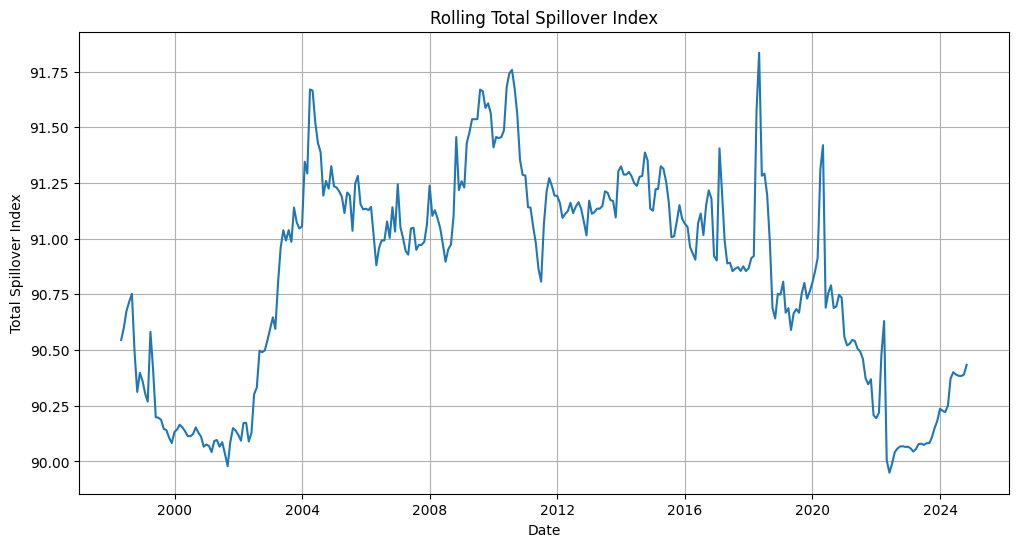

In [33]:
# Select relevant data
data =  df[['sp500r',	'oilr',	'gpr',	'twar'	,'env']].dropna()

# 2. Choose VAR Lag Order
model = VAR(data)
lag_order = model.select_order(maxlags=10) # Experiment with max lags
print(f"Optimal VAR lag order: {lag_order.selected_orders['aic']}")
results = model.fit(lag_order.selected_orders['aic'], trend='c') # Include a constan

# 3. Forecast Error Variance Decomposition (FEVD)
fevd = results.fevd() # we Choose a forecast horizon of 10 periods

print(fevd.decomp.shape)
fevd_matrix = fevd.decomp[fevd.periods - 6] # FEVD at the chosen horizon

# 4. Calculate Diebold-Yilmaz Spillover Index (Generalized Approach)
def generalized_dy_spillover(fevd_matrix):
    n_vars = fevd_matrix.shape[0]
    total_spillover = (np.sum(fevd_matrix) - np.trace(fevd_matrix)) / np.sum(fevd_matrix) * 100

    to_spillover = pd.Series((np.sum(fevd_matrix, axis=0) - np.diag(fevd_matrix)) / np.sum(fevd_matrix) * 100, index=data.columns)
    from_spillover = pd.Series((np.sum(fevd_matrix, axis=0) - np.diag(fevd_matrix)) / np.sum(fevd_matrix) * 100, index=data.columns)
    net_spillover = to_spillover - from_spillover
    return total_spillover, to_spillover, from_spillover, net_spillover

total_spill, to_spill, from_spill, net_spill = generalized_dy_spillover(fevd_matrix)

print("\n--- Diebold-Yilmaz Spillover Analysis ---")
print(f"Total Spillover Index (Horizon = {fevd.periods}): {total_spill:.2f}%")
print("\nTo Spillover (Contribution to others):")
print(to_spill)
print("\nFrom Spillover (Receiving from others):")
print(from_spill)
print("\nNet Spillover (To - From):")
print(net_spill)

# 5. Rolling Window Analysis (for dynamic spillovers)
window_size = 100
total_spill_rolling = []
dates_rolling = data.index[window_size-1:]

for i in range(window_size, len(data)):
    data_window = data.iloc[i-window_size:i]
    model_rolling = VAR(data_window)
    results_rolling = model_rolling.fit(lag_order.selected_orders['aic'], trend='c')
    fevd_rolling = results_rolling.fevd()
    fevd_matrix_rolling = fevd_rolling.decomp[fevd_rolling.periods - 6]
    total_spill_rolling.append(generalized_dy_spillover(fevd_matrix_rolling)[0])

plt.figure(figsize=(12, 6))
plt.plot(dates_rolling[:-1], total_spill_rolling)
plt.xlabel("Date")
plt.ylabel("Total Spillover Index")
plt.title("Rolling Total Spillover Index")
plt.grid(True)
plt.show()


The study shows that there is a greater overall interconnectedness between the markets and risk factors through the total spillover index which is 90.36%. And also, an environnemtal shock has a great impact in the financial and commodity markets at 68.42%; follow by, trade war  with 21.15%, environnemtal shock with 3.25%, geopolitical risk with 0.03%. In addition, the potential feedback effects from the markets generate the same impact in the variability of risk factors.

The rolling spillover indices graph allow us to observe how the impact of these risk factors changes over time, potentially spiking during periods of heightened geopolitical tensions, trade disputes, or environmental crises.

#**ADVANCED ML/DL TECHNIQUES:**

**LSTM Analysis:**

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,302 (44.15 KB)

 Trainable params: 11,302 (44.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6181 - loss: 0.6766 - val_accuracy: 0.5517 - val_loss: 0.6984
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6038 - loss: 0.6730 - val_accuracy: 0.5517 - val_loss: 0.7066
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6493 - loss: 0.6533 - val_accuracy: 0.5517 - val_loss: 0.7265
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6320 - loss: 0.6571 - val_accuracy: 0.5517 - val_loss: 0.7366
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6038 - loss: 0.6717 - val_accuracy: 0.5517 - val_loss: 0.7210
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6220 - loss: 0.6566 - val_accuracy: 0.5517 - val_loss: 0.7187
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6246 - loss: 0.6522 - val_accuracy: 0.5517 - val_loss: 0.7233
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6191 - loss: 0.6477 - val_accuracy: 0.5517 - val_loss: 0.7284


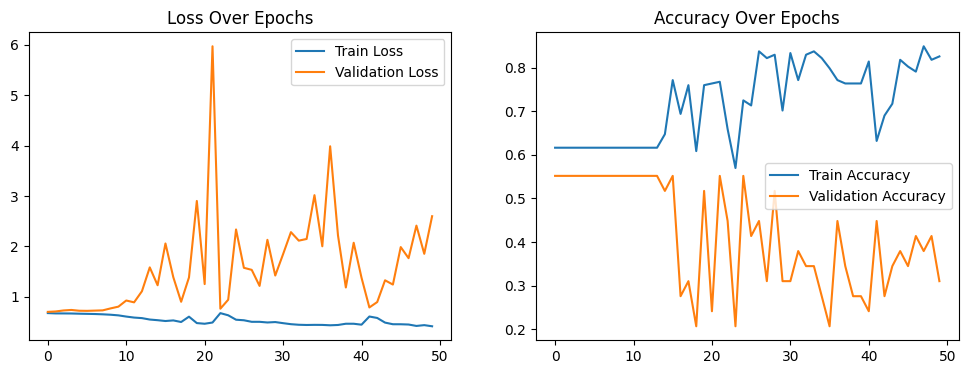

Test Loss: 2.3219
Test Accuracy: 0.8472
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.85      1.00      0.92        61

    accuracy                           0.85        72
   macro avg       0.42      0.50      0.46        72
weighted avg       0.72      0.85      0.78        72



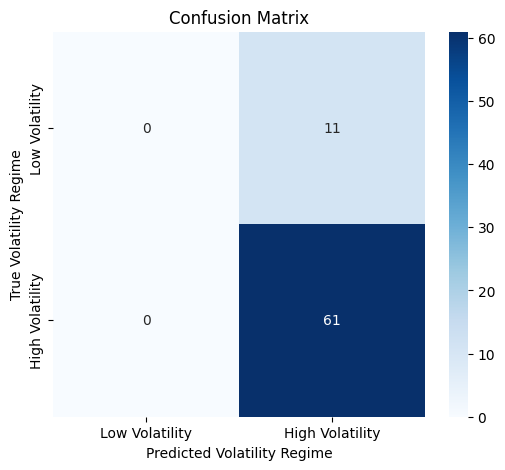

In [34]:
# Select risk factors and market returns
risk_factors = ['gpr', 'twar', 'env']
market_returns_cols = ['sp500r', 'oilr'] # Corrected 'sp500' to 'sp500r' based on previous code blocks
data = df[risk_factors + market_returns_cols].dropna() # drop initial NaNs

# 2. Define Volatility Regimes based on Market Returns
window = 10  # Rolling window for volatility calculation

# Calculate volatility *before* assigning it to the data DataFrame
# This ensures the index aligns initially
volatility = data[market_returns_cols].rolling(window=window).std().mean(axis=1)

# Define volatility thresholds based on the calculated volatility Series (which includes NaNs initially)
# Ensure the quantile calculation handles potential NaNs from the rolling window
volatility_threshold_low = volatility.quantile(0.3)
volatility_threshold_high = volatility.quantile(0.4)


# Explicitly align volatility with data's index before using it for boolean indexing
volatility_aligned = volatility.reindex(data.index)

# Now use the aligned volatility series for comparisons
data.loc[volatility_aligned > volatility_threshold_high, 'Volatility_Regime'] = 1  # 1: High Volatility
data.loc[volatility_aligned <= volatility_threshold_low, 'Volatility_Regime'] = 0   # 0: Low Volatility

# Now drop rows where 'Volatility_Regime' is NaN (which might happen if volatility_aligned was NaN)
data = data.dropna(subset=['Volatility_Regime'])

# Convert 'Volatility_Regime' to integer type after dropping NaNs to avoid issues with to_categorical
data['Volatility_Regime'] = data['Volatility_Regime'].astype(int)


# Prepare input features (risk factors and market returns) and target (volatility regime)
# Now X and y should have aligned rows
X = data[risk_factors + market_returns_cols].values
y_categorical = to_categorical(data['Volatility_Regime'].values)

# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape input for LSTM: [samples, time steps, features]
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    # Adjusted loop range to prevent index errors when using lookback window
    for i in range(time_steps, len(X)):
        Xs.append(X[i - time_steps:i]) # Sequence of past 'time_steps'
        ys.append(y[i])                # Target at current time 'i'
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10
# Pass X_scaled and y_categorical, which are already aligned after dropping NaNs in 'data'
X_sequences, y_sequences = create_sequences(X_scaled, y_categorical, TIME_STEPS)

# Split data into training and testing sets
# Ensure consistent splitting after sequence creation
if len(X_sequences) == 0:
    print("Not enough data to create sequences with the specified TIME_STEPS.")
else:
    X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_sequences, test_size=0.2, shuffle=False)

    # 3. Build the LSTM Model
    # Determine the number of output classes from y_sequences shape
    num_classes = y_sequences.shape[1]
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(num_classes, activation='softmax')) # Output layer for classification

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Model summary
    model.summary()

    # 4. Train the LSTM Model
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

    # Plot training history
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss Over Epochs')
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy Over Epochs')
    plt.show()

    # 5. Evaluate the Model
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {accuracy:.4f}')

    # Make predictions
    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Classification Report
    print('\nClassification Report:')
    print(classification_report(y_true_classes, y_pred_classes))

    # Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(6, 5))
    # Adjust xticklabels and yticklabels based on the number of classes
    if num_classes == 3:
        labels = ['Low Volatility', 'Medium Volatility', 'High Volatility']
    elif num_classes == 2:
         labels = ['Low Volatility', 'High Volatility']
    else:
         labels = [f'Regime {i}' for i in range(num_classes)]

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels,
                yticklabels=labels)
    plt.xlabel('Predicted Volatility Regime')
    plt.ylabel('True Volatility Regime')
    plt.title('Confusion Matrix')
    plt.show()
    #model.summary()

this result shows that LSTM model identify high volatility more than low volatility related to risk factors of the study.:

**Bayesian Network Analysis:**


Conditional Probability Distributions (CPDs) from Data:

 +--------+----------+
| gpr(0) | 0.334129 |
+--------+----------+
| gpr(1) | 0.331742 |
+--------+----------+
| gpr(2) | 0.334129 |
+--------+----------+

 +---------+---------+-----+---------+---------------------+
| env     | env(0)  | ... | env(2)  | env(2)              |
+---------+---------+-----+---------+---------------------+
| gpr     | gpr(0)  | ... | gpr(2)  | gpr(2)              |
+---------+---------+-----+---------+---------------------+
| twar    | twar(0) | ... | twar(1) | twar(2)             |
+---------+---------+-----+---------+---------------------+
| oilr(0) | 0.35    | ... | 0.375   | 0.4                 |
+---------+---------+-----+---------+---------------------+
| oilr(1) | 0.3     | ... | 0.0     | 0.3111111111111111  |
+---------+---------+-----+---------+---------------------+
| oilr(2) | 0.35    | ... | 0.625   | 0.28888888888888886 |
+---------+---------+-----+---------+---------------------+

 +--

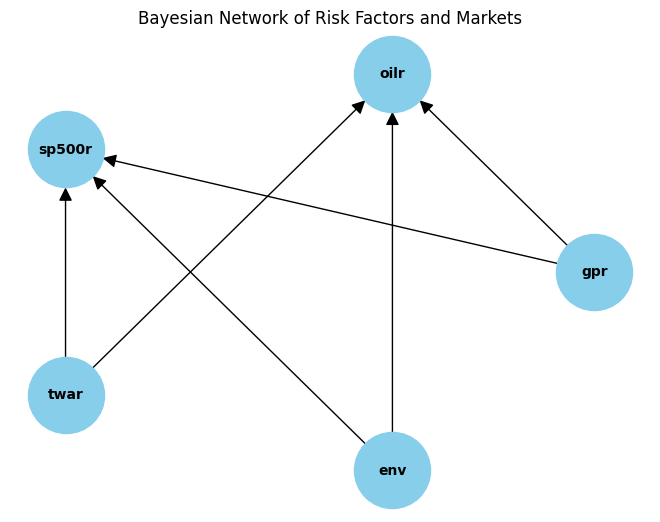

In [35]:

# Select relevant columns
try:
    data = df[['gpr', 'twar', 'env',
               'sp500r', 'oilr']].copy()
except KeyError as e:
    print(f"Error: Column '{e}' not found: {e}")
    exit()

data = data.dropna()

# 2. Discretization of Continuous Variables

n_bins = 3
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='quantile')
data_discretized = pd.DataFrame(discretizer.fit_transform(data), columns=data.columns, index=data.index)

# Convert to integer for pgmpy
data_discretized = data_discretized.astype(int)

# Define the states (categories) for each variable
states = {col: list(range(n_bins)) for col in data_discretized.columns}


node_names = {'gpr': 'gpr',
              'twar': 'twar',
              'env': 'env',
              'sp500r': 'sp500r',
              'oilr': 'oilr'}


states = {node_names[k]: v for k, v in states.items()}
node_list = list(node_names.values())

# 3. Define the Bayesian Network Structure (Hypothesized)

model = DiscreteBayesianNetwork([('gpr', 'oilr'), ('gpr', 'sp500r'), ('twar', 'sp500r'),
                       ('env', 'oilr'), ('env', 'sp500r'), ('twar', 'oilr')])

# Add nodes to the model
model.add_nodes_from(node_list)

# 4. Learn the Conditional Probability Distributions (CPDs) from Data
model.fit(data_discretized, estimator=MaximumLikelihoodEstimator)


print("\nConditional Probability Distributions (CPDs) from Data:")

# Print the learned CPDs
for cpd in model.get_cpds():
    print("\n", cpd)

# 5. Perform Inference
inference = VariableElimination(model)

# case 1: Probability of Financial Market state given high Geopolitical Risk and Trade War
print("\nProbability of Global Financial Market state given High gpr and High twar:")
q1 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][-1], 'twar': states['twar'][-1]})
print(q1)

# case 2: Probability of Financial Market state given high Geopolitical Risk and Environmental Shock
print("\nProbability of Global Financial Market state given High gpr and Environmental Shock:")
q2 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][-1], 'env': states['env'][-1]})
print(q2)

# case 3: Probability of Financial Market state given high Trade War and Environmental Shock
print("\nProbability of Global Financial Market state given High trade war and Environmental Shock:")
q3 = inference.query(variables=['sp500r'], evidence={'twar': states['twar'][-1], 'env': states['env'][-1]})
print(q3)

# case 4: Probability of Financial Market state given low Geopolitical Risk and Trade War
print("\nProbability of Global Financial Market state given Low gpr and Low twar:")
q4 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][0], 'twar': states['twar'][0]})
print(q4)

# case 5: Probability of Financial Market state given low Geopolitical Risk and Environmental Shock
print("\nProbability of Global Financial Market state given Low gpr and Low Environmental Shock:")
q5 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][0], 'env': states['env'][0]})
print(q5)

# case 6: Probability of Financial Market state given low Trade War and Environmental Shock
print("\nProbability of Global Financial Market state given Low trade war and Environmental Shock:")
q6 = inference.query(variables=['sp500r'], evidence={'twar': states['twar'][0], 'env': states['env'][0]})
print(q6)

# case 7: Probability of Commodity Market state given high Geopolitical Risk and Trade War
print("\nProbability of Commodity Market Market state given High gpr and High twar:")
q7 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][-1], 'twar': states['twar'][-1]})
print(q7)

# case 8: Probability of Commodity Market state given high Geopolitical Risk and Environmental Shock
print("\nProbability of Commodity Market state given High gpr and Environmental Shock:")
q8 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][-1], 'env': states['env'][-1]})
print(q8)

# case 9: Probability of Commodity Market state given high Trade War and Environmental Shock
print("\nProbability of Commodity Market state given High trade war and Environmental Shock:")
q9 = inference.query(variables=['oilr'], evidence={'twar': states['twar'][-1], 'env': states['env'][-1]})
print(q9)

# case 10: Probability of Commodity Market state given low Geopolitical Risk and Trade War
print("\nProbability of Commodity Market state given Low gpr and Low twar:")
q10 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][0], 'twar': states['twar'][0]})
print(q10)

# case 11: Probability of Commodity Market state given low Geopolitical Risk and Environmental Shock
print("\nProbability of Commodity Market state given Low gpr and Low Environmental Shock:")
q11 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][0], 'env': states['env'][0]})
print(q11)

# case 12: Probability of Financial Market state given low Trade War and Environmental Shock
print("\nProbability of Commodity Market state given Low trade war and Environmental Shock:")
q12 = inference.query(variables=['oilr'], evidence={'twar': states['twar'][0], 'env': states['env'][0]})
print(q12)


# case 13: Probability of Commodity Market state given Environmental Shock
print("\nProbability of Commodity Market state given High Environmental Shock:")
q13 = inference.query(variables=['oilr'], evidence={'env': states['env'][-1]})
print(q13)

# case 14: Probability of Commodity Market state given Trade war
print("\nProbability of Commodity Market state given High Trade war:")
q14 = inference.query(variables=['oilr'], evidence={'twar': states['twar'][-1]})
print(q14)

# case 15: Probability of Commodity Market state given Geopolitical risk
print("\nProbability of Commodity Market state given High Geopolitical Risk:")
q15 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][-1]})
print(q15)

# case 16: Probability of Commodity Market state given Environmental Shock
print("\nProbability of Commodity Market state given Low Environmental Shock:")
q16 = inference.query(variables=['oilr'], evidence={'env': states['env'][0]})
print(q16)

# case 17: Probability of Commodity Market state given Trade war
print("\nProbability of Commodity Market state given High Trade war:")
q17 = inference.query(variables=['oilr'], evidence={'twar': states['twar'][0]})
print(q17)

# case 18: Probability of Commodity Market state given Geopolitical risk
print("\nProbability of Commodity Market state given Low Geopolitical Risk:")
q18 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][0]})
print(q18)

# case 19: Probability of Global Financial Market state given Environmental Shock
print("\nProbability of Global Financial Market state given High Environmental Shock:")
q19 = inference.query(variables=['sp500r'], evidence={'env': states['env'][-1]})
print(q19)

# case 20: Probability of Global Financial Market state given Trade war
print("\nProbability of Global Financial Market state given High Trade war:")
q20 = inference.query(variables=['sp500r'], evidence={'twar': states['twar'][-1]})
print(q20)

# case 21: Probability of Global Financial Market state given Geopolitical risk
print("\nProbability of Global Financial Market state given High Geopolitical Risk:")
q21 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][-1]})
print(q21)

# case 22: Probability of Global Financial Market state given Environmental Shock
print("\nProbability of Global Financial Market state given Low Environmental Shock:")
q22 = inference.query(variables=['sp500r'], evidence={'env': states['env'][0]})
print(q22)

# case 23: Probability of Global Financial Market state given Trade war
print("\nProbability of Global Financial Market state given High Trade war:")
q23 = inference.query(variables=['sp500r'], evidence={'twar': states['twar'][0]})
print(q23)

# case 24: Probability of Global Financial Market state given Geopolitical risk
print("\nProbability of Global Financial Market state given Low Geopolitical Risk:")
q24 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][0]})
print(q24)


# case 25: Probability of Global Financial Market given High Geopolitical Risk , Trade War and Environmental Shock
print("\nProbability of Global Financial Market given High Geopolitical Risk , Trade War and Environmental Shock:")
q25 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][-1],'twar': states['twar'][-1], 'env': states['env'][-1]})
print(q25)

# case 26: Probability of Global Financial Market given High Geopolitical Risk , Trade War and Environmental Shock
print("\nProbability of Global Financial Market given High Geopolitical Risk , Trade War and Environmental Shock:")
q26 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][0],'twar': states['twar'][0], 'env': states['env'][0]})
print(q26)

# case 27: Probability of Commodity Market given High Geopolitical Risk , Trade War and Environmental Shock
print("\nProbability of Commodity Market given High Geopolitical Risk , Trade War and Environmental Shock:")
q27 = inference.query(variables=['sp500r'], evidence={'gpr': states['gpr'][-1],'twar': states['twar'][-1], 'env': states['env'][-1]})
print(q27)

# case 28: Probability of Commodity Market given High Geopolitical Risk , Trade War and Environmental Shock
print("\nProbability of Commodity Market given High Geopolitical Risk , Trade War and Environmental Shock:")
q28 = inference.query(variables=['oilr'], evidence={'gpr': states['gpr'][0],'twar': states['twar'][0], 'env': states['env'][0]})
print(q28)


# 6. Visualize the Bayesian Network Graph
def plot_bayesian_network(model):

    pos = nx.circular_layout(model)  # Define layout algorithm


    nx.draw(model, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20)
    plt.title("Bayesian Network of Risk Factors and Markets")
    plt.show()

plot_bayesian_network(model)

The study shows that:

when Geopolitical risk index, trade war and environmental shock are all high :
  - the bear probability of Commodity Markets is valued at 35% , while its stable probability is valued at 30% and its bull probability is valued at 35% too.
  - the bear probability of Global Financial Markets is valued at 25% , while its stable probability is valued at 15% and its bull probability is valued at 60%.

but when Geopolitical risk index, trade war and environmental shock are all low :
  - the bear probability of Commodity Markets is valued at 40% , while its stable probability is valued at 31% and its bull probability is valued at 28% .
  - the bear probability of Global Financial Markets is valued at 26.67% , while its stable probability is valued at 33.33% and its bull probability is valued at 40% .

when Geopolitical risk index and environmental shock are low , but trade war is medium :
  - the bear probability of Commodity Markets is valued at 37.5% , while its stable probability is valued at 0% and its bull probability is valued at 62.5% .
  - the bear probability of Global Financial Markets is valued at 50% , while its stable probability is valued at 25% and its bull probability is valued at 25% .

Also , from the evidence state:
  - given High gpr and High twar:
       - Global Financial Market bear  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 33.1%
       - Global Financial Market stable  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 37.75%
       - Global Financial Market stable  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 29.15%

       - Commodity Market bear  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 31.58%
       - Commodity Market stable  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 36.20%
       - Commodity Market stable  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 32.12%
       
  - given High gpr and High env:
       - Global Financial Market bear  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 25.5%
       - Global Financial Market stable  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 19.43%
       - Global Financial Market stable  : The probability density function of a Gaussian distribution modeling the S&P 500 returns is valued at 55.07%

       - Commodity Market bear  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 42.51%
       - Commodity Market stable  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 10.40%
       - Commodity Market stable  : The probability density function of a Gaussian distribution modeling the crude oil returns is valued at 47.09%
       



#**PRACTICAL APPLICATIONS:**

**Stress Testing:**

In [36]:
# Select relevant columns
market_returns_cols = ['sp500r', 'oilr']
risk_factor_cols = ['gpr', 'twar', 'env']

try:
    market_returns = df[market_returns_cols].copy().dropna()
    risk_factors = df[risk_factor_cols].copy().dropna()
except KeyError as e:
    print(f"Error: Column '{e}' not found: {e}")
    exit()

# Align the time series
combined_index = market_returns.index.intersection(risk_factors.index)
market_returns = market_returns.loc[combined_index]
risk_factors = risk_factors.loc[combined_index]

# 2. Define Stress Scenarios

stress_scenarios = {
    'gpr_High': risk_factors['gpr'].quantile(0.95),
    'gpr_Low': risk_factors['gpr'].quantile(0.05),
    'twar_High': risk_factors['twar'].quantile(0.95),
    'twar_Low': risk_factors['twar'].quantile(0.05),
    'env_High': risk_factors['env'].quantile(0.95),
    'env_Low': risk_factors['env'].quantile(0.05),
}

# 3. Simple Stress Testing - Conditional Performance
def analyze_performance_under_stress(market_returns, risk_factors, scenario_thresholds):
    results = {}
    for market in market_returns.columns:
        results[market] = {}
        for scenario, threshold in scenario_thresholds.items():
            factor_name = scenario.split('_')[0]
            condition = None
            if 'High' in scenario:
                condition = risk_factors[factor_name] >= threshold
            elif 'Low' in scenario:
                condition = risk_factors[factor_name] <= threshold

            if condition is not None:
                stressed_returns = market_returns[market][condition]
                if not stressed_returns.empty:
                    results[market][scenario] = {
                        'Average Return': stressed_returns.mean(),
                        'Volatility': stressed_returns.std(),
                        'VaR_0.05': np.percentile(stressed_returns, 5),
                        'ES_0.05': stressed_returns[stressed_returns <= np.percentile(stressed_returns, 5)].mean(),
                        'Count': len(stressed_returns)
                    }
                else:
                    results[market][scenario] = "No data for this scenario"
    return results

stress_test_results_simple = analyze_performance_under_stress(market_returns, risk_factors, stress_scenarios)
print("\n--- Simple Stress Test - Conditional Performance ---")
for market, scenarios in stress_test_results_simple.items():
    print(f"\nMarket: {market}")
    for scenario, metrics in scenarios.items():
        print(f"  Scenario: {scenario}, Metrics: {metrics}\n")

# 4. Regression-Based Stress Testing (Illustrative)

def regression_based_stress_test(market_returns, risk_factors, stress_levels):
    results = {}
    # Add constant BEFORE creating the index for the prediction vector
    X = sm.add_constant(risk_factors)

    for market in market_returns.columns:
        y = market_returns[market]
        # Fit the OLS model
        model = sm.OLS(y, X).fit()
        results[market] = {}

        # Get the expected column names from the fitted model's exog
        model_exog_cols = model.model.exog_names # Use exog_names from the model's design matrix

        for scenario, level in stress_levels.items():
            factor_name = scenario.split('_')[0].lower() # Ensure lowercase to match DataFrame column names

            # Start with a vector of mean values
            # Create a dictionary matching model's exog names
            stress_data = {col: risk_factors[col].mean() for col in risk_factors.columns}
            stress_data['const'] = 1.0 # Add the constant

            # Convert to Series in the correct order based on model_exog_cols
            stress_vector = pd.Series(stress_data).reindex(model_exog_cols)

            # Apply the stress level to the specific factor, ensuring the factor name is correct
            if factor_name in stress_vector.index:
                 stress_vector[factor_name] = level
            else:
                 print(f"Warning: Factor '{factor_name}' not found in model columns: {model_exog_cols}")
                 results[market][scenario] = "Factor not found in model"
                 continue # Skip prediction for this scenario

            # Reshape the stress_vector to be a 2D array (1 row, n columns) for prediction
            stress_vector_2d = stress_vector.values.reshape(1, -1)

            try:
                # Make the prediction using the correctly shaped and ordered vector
                predicted_return = model.predict(stress_vector_2d)[0]
                results[market][scenario] = f"Predicted Return: {predicted_return:.4f}"
            except ValueError as e:
                print(f"Error predicting for {market}, scenario {scenario}: {e}")
                print(f"Stress vector shape: {stress_vector_2d.shape}")
                print(f"Model params shape: {model.params.shape}")
                results[market][scenario] = f"Prediction Error: {e}"

    return results

# Define specific stress levels for regression
# Ensure keys match expected factor names (lowercase)
regression_stress_levels = {
    'gpr_Plus_2SD': risk_factors['gpr'].mean() + 2 * risk_factors['gpr'].std(),
    'gpr_Minus_2SD': risk_factors['gpr'].mean() - 2 * risk_factors['gpr'].std(),
    'twar_Plus_2SD': risk_factors['twar'].mean() + 2 * risk_factors['twar'].std(),
    'twar_Minus_2SD': risk_factors['twar'].mean() - 2 * risk_factors['twar'].std(),
    'env_Plus_2SD': risk_factors['env'].mean() + 2 * risk_factors['env'].std(),
    'env_Minus_2SD': risk_factors['env'].mean() - 2 * risk_factors['env'].std(),
}

stress_test_results_regression = regression_based_stress_test(market_returns, risk_factors, regression_stress_levels)
print("\n--- Regression-Based Stress Test (Illustrative) ---")
for market, scenarios in stress_test_results_regression.items():
    print(f"\nMarket: {market}")
    for scenario, prediction in scenarios.items():
        print(f"  Scenario: {scenario}, {prediction}\n")

# 6. Visualization of Stress Test Results (This part remains the same as it was not the source of the error)

def plot_stress_test_results(results):
    # Note: This plotting function is designed for the 'Simple Stress Test' results
    # which contain 'Average Return', 'Volatility', 'VaR', 'ES'.
    # It will not directly work for the 'Regression-Based Stress Test' results
    # which only contain a 'Predicted Return' string.
    # A separate plotting function would be needed for the regression results.

    # Let's check if the results have the expected structure for plotting
    first_market_key = list(results.keys())[0] if results else None
    if not first_market_key or not results[first_market_key]:
        print("No results to plot or results format is not suitable for this plot function.")
        return

    first_scenario_key = list(results[first_market_key].keys())[0]
    if not isinstance(results[first_market_key][first_scenario_key], dict):
        print("Plotting function is for simple stress test results (dict format).")
        print("Regression results are strings and require a different plot.")
        return # Exit if format is not as expected

    fig, axes = plt.subplots(len(results), len(results[first_market_key]), figsize=(15, 10), sharey='row')
    # Handle case with only one row/column
    if len(results) == 1 and len(results[first_market_key]) == 1:
         axes = np.array([[axes]]) # Make it 2D for consistent indexing
    elif len(results) == 1:
         axes = axes.reshape(1, -1) # Make it 2D if only one row
    elif len(results[first_market_key]) == 1:
         axes = axes.reshape(-1, 1) # Make it 2D if only one column


    for i, market in enumerate(results.keys()):
        for j, scenario in enumerate(results[market].keys()):
            ax = axes[i, j]
            if isinstance(results[market][scenario], dict):
                metrics = results[market][scenario]
                # Ensure all expected metrics exist before plotting
                plot_metrics = ['Average Return', 'Volatility', 'VaR_0.05', 'ES_0.05']
                values_to_plot = [metrics.get(m, 0) for m in plot_metrics] # Use .get to handle missing keys
                labels = ['Avg Ret', 'Vol', 'VaR', 'ES']

                ax.bar(labels, values_to_plot)
                ax.set_title(f'{market}\n{scenario}')
                ax.tick_params(axis='x', rotation=45)
            else:
                # This part is for scenarios where there is no data (string message)
                ax.text(0.5, 0.5, str(results[market][scenario]), horizontalalignment='center', verticalalignment='center', wrap=True)
                ax.set_title(f'{market}\n{scenario}')
                ax.axis('off') # Hide axes for text plots
    plt.tight_layout()
    plt.show()




--- Simple Stress Test - Conditional Performance ---

Market: sp500r
  Scenario: gpr_High, Metrics: {'Average Return': np.float64(0.01720655807879263), 'Volatility': 0.04809982945302108, 'VaR_0.05': np.float64(-0.05118430645643206), 'ES_0.05': np.float64(-0.06957050913038755), 'Count': 21}

  Scenario: gpr_Low, Metrics: {'Average Return': np.float64(-0.004393768487617169), 'Volatility': 0.05620483661863752, 'VaR_0.05': np.float64(-0.09229073539585636), 'ES_0.05': np.float64(-0.11904372682298418), 'Count': 21}

  Scenario: twar_High, Metrics: {'Average Return': np.float64(0.008000111994390447), 'Volatility': 0.045222556716080164, 'VaR_0.05': np.float64(-0.0841104836384047), 'ES_0.05': np.float64(-0.08794368915918864), 'Count': 21}

  Scenario: twar_Low, Metrics: {'Average Return': np.float64(0.018404239784568878), 'Volatility': 0.03856797462387603, 'VaR_0.05': np.float64(-0.05388244223983198), 'ES_0.05': np.float64(-0.05904357652161478), 'Count': 21}

  Scenario: env_High, Metrics: {'A

this study shows that:
  - under extreme conditions of risk factors such as:
     - geopolitical risk :
          - Global financial market got average return higher in high regime than in low regime , but fluctuated more in low regime than in high regime
               
          - Commodity market got average return higher in high regime than in low regime , and  fluctuated more in high regime than in low regime
     

     - Trade war tension :
          - Global financial market got average return lower in high regime than in low regime , but fluctuated more in high regime than in low regime
               
          - Commodity market got average return lower in high regime than in low regime , and  fluctuated less in high regime than in low regime
     
     - Environmental Shock :
          - Global financial market got average return lower in high regime than in low regime , but fluctuated more in high regime than in low regime
               
          - Commodity market got average return higher in high regime than in low regime , and  fluctuated more in high regime than in low regime



**Portfolio Analysis:**

--- Basic Portfolio Statistics ---
Asset Returns Data (first 5 rows):
               sp500r      oilr
date                          
1990-01-31  0.008539 -0.033362
1990-02-28  0.024255 -0.081233
1990-03-31 -0.026887 -0.101198
1990-04-30  0.091989 -0.012339
1990-05-31 -0.008886 -0.086273

Descriptive Statistics of Asset Returns:
            sp500r        oilr
count  419.000000  419.000000
mean     0.007832    0.002675
std      0.042646    0.096558
min     -0.169425   -0.568191
25%     -0.017623   -0.048522
50%      0.011834    0.012594
75%      0.034861    0.056328
max      0.126844    0.545852


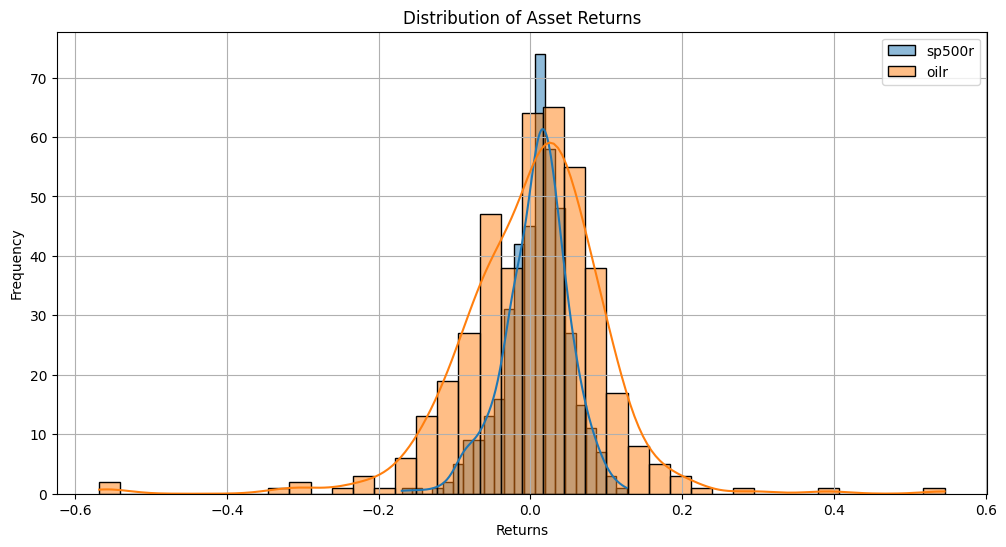


--- Equally Weighted Portfolio ---
Portfolio Weights:
 sp500r    0.5
oilr      0.5
dtype: float64

Portfolio Returns Data (first 5 rows):
 date
1990-01-31   -0.012412
1990-02-28   -0.028489
1990-03-31   -0.064042
1990-04-30    0.039825
1990-05-31   -0.047580
Name: Portfolio_Returns, dtype: float64

Descriptive Statistics of Portfolio Returns:
 count    419.000000
mean       0.005254
std        0.054084
min       -0.336752
25%       -0.021408
50%        0.011461
75%        0.037189
max        0.295567
Name: Portfolio_Returns, dtype: float64


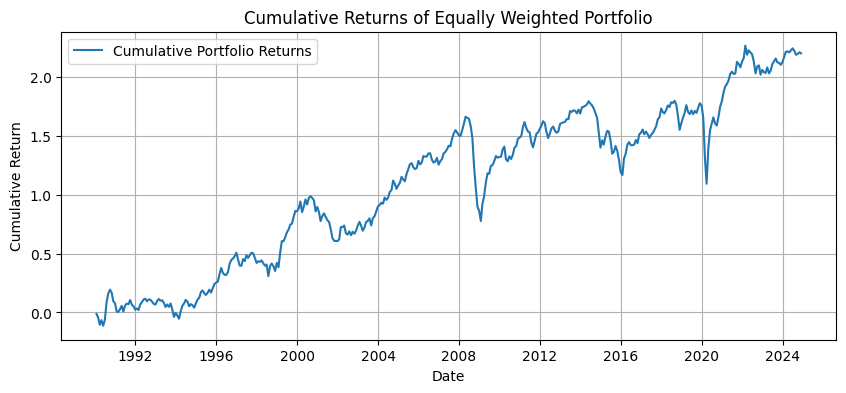


--- Portfolio Risk and Return Metrics ---
Annualized Return: 2.7450
Annualized Volatility: 0.8586
Sharpe Ratio: 3.1739
Maximum Drawdown: -0.6194


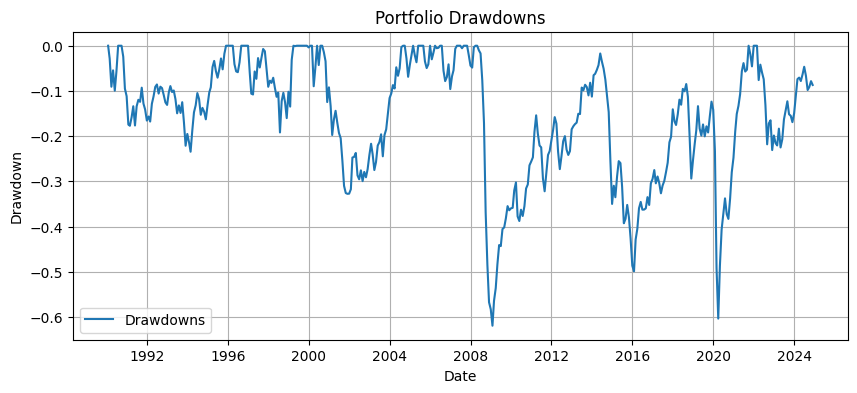


--- Impact of Risk Factors (Conceptual) ---

Correlation with Risk Factors:
                    Portfolio_Returns       gpr      twar       env
Portfolio_Returns           1.000000 -0.067353 -0.017118 -0.007686
gpr                        -0.067353  1.000000  0.016600  0.093261
twar                       -0.017118  0.016600  1.000000  0.516293
env                        -0.007686  0.093261  0.516293  1.000000

Regression Analysis Summary:
                             OLS Regression Results                            
Dep. Variable:      Portfolio_Returns   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6751
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.568
Time:                        15:46:49   Log-Likelihood:                 629.30
No. Observations:                 419   AIC:                            -1251.
Df 

In [37]:

# Select asset return columns
asset_returns_cols = ['sp500r', 'oilr']
try:
    asset_returns = df[asset_returns_cols].copy().dropna()
except KeyError as e:
    print(f"Error: Column '{e}' not found: {e}")
    exit()

# 2. Basic Portfolio Statistics
print("--- Basic Portfolio Statistics ---")
print("Asset Returns Data (first 5 rows):\n", asset_returns.head())
print("\nDescriptive Statistics of Asset Returns:\n", asset_returns.describe())

# Visualize returns distribution (including negative)
plt.figure(figsize=(12, 6))
for col in asset_returns.columns:
    sns.histplot(asset_returns[col], kde=True, label=col)
plt.title('Distribution of Asset Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# 3. Portfolio Construction (Example: Equally Weighted)
weights = pd.Series([1/len(asset_returns_cols)] * len(asset_returns_cols), index=asset_returns_cols)
# Explicitly name the portfolio_returns Series before concatenation
portfolio_returns = (asset_returns * weights).sum(axis=1)
portfolio_returns.name = 'Portfolio_Returns'

print("\n--- Equally Weighted Portfolio ---")
print("Portfolio Weights:\n", weights)
print("\nPortfolio Returns Data (first 5 rows):\n", portfolio_returns.head())
print("\nDescriptive Statistics of Portfolio Returns:\n", portfolio_returns.describe())

# Visualize portfolio returns
plt.figure(figsize=(10, 4))
plt.plot(portfolio_returns.index, portfolio_returns.cumsum(), label='Cumulative Portfolio Returns')
plt.title('Cumulative Returns of Equally Weighted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# 4. Risk and Return Metrics (Handling Negative Returns)
print("\n--- Portfolio Risk and Return Metrics ---")

# Annualized Return (assuming daily returns, 252 trading days)
annualized_return = (1 + portfolio_returns.mean())**252 - 1
print(f"Annualized Return: {annualized_return:.4f}")

# Annualized Volatility
annualized_volatility = portfolio_returns.std() * np.sqrt(252)
print(f"Annualized Volatility: {annualized_volatility:.4f}")

# Sharpe Ratio (assuming a risk-free rate of 2% per year)
risk_free_rate = 0.02
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

# Drawdown Analysis (identifying periods of negative returns)
def calculate_drawdowns(returns):
    cumulative_returns = (1 + returns).cumprod()
    peak = cumulative_returns.cummax()
    drawdowns = (cumulative_returns - peak) / peak
    return drawdowns

drawdowns = calculate_drawdowns(portfolio_returns)
max_drawdown = drawdowns.min()
print(f"Maximum Drawdown: {max_drawdown:.4f}")

plt.figure(figsize=(10, 4))
plt.plot(drawdowns.index, drawdowns, label='Drawdowns')
plt.title('Portfolio Drawdowns')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()

# 5. Incorporating Risk Factors (Conceptual - Extend as needed)
print("\n--- Impact of Risk Factors (Conceptual) ---")
# To quantify the impact, you would typically:

# A. Merge portfolio returns with risk factor data (ensure alignment)
risk_factors = df[['gpr', 'twar', 'env']].copy().dropna()
# Now portfolio_returns has the name 'Portfolio_Returns'
combined_data = pd.concat([portfolio_returns, risk_factors], axis=1).dropna()

# B. Analyze correlations:
correlation_matrix = combined_data.corr()
print("\nCorrelation with Risk Factors:\n", correlation_matrix)

# C. Regression Analysis:
# import statsmodels.api as sm # Already imported
X = sm.add_constant(combined_data[['gpr', 'twar', 'env']])
# Access the column using the name we explicitly set
y = combined_data['Portfolio_Returns'] # <--- This will now work
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Summary:\n", model.summary())

# D. Regime Analysis (as shown in previous examples)

# 6. Advanced Portfolio Optimization (Handles Negative Returns)


def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

def portfolio_return(weights, returns):
    return weights.T @ returns.mean()

def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    ret = portfolio_return(weights, returns) * 252
    vol = np.sqrt(portfolio_variance(weights, cov_matrix) * 252)
    return (ret - risk_free_rate) / vol if vol != 0 else 0

def minimize_volatility(weights, cov_matrix):
    return portfolio_variance(weights, cov_matrix)

def maximize_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, returns, cov_matrix, risk_free_rate)

def optimal_portfolio(returns, risk_free_rate=0.02):
    n_assets = returns.shape[1]
    args = (returns, returns.cov(), risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})
    bounds = tuple((0, 1) for asset in range(n_assets))
    initial_weights = np.array([1/n_assets] * n_assets)

    # Minimize Volatility
    min_vol_result = minimize(minimize_volatility, initial_weights, args=(returns.cov()),
                               method='SLSQP', bounds=bounds, constraints=constraints)
    min_vol_weights = min_vol_result.x

    # Maximize Sharpe Ratio
    max_sharpe_result = minimize(maximize_sharpe_ratio, initial_weights, args=args,
                                 method='SLSQP', bounds=bounds, constraints=constraints)
    max_sharpe_weights = max_sharpe_result.x

    return min_vol_weights, max_sharpe_weights

min_vol_weights, max_sharpe_weights = optimal_portfolio(asset_returns)

print("\n--- Optimal Portfolio Allocation ---")
print("Minimum Volatility Portfolio Weights:\n", pd.Series(min_vol_weights, index=asset_returns.columns))
print("\nMaximum Sharpe Ratio Portfolio Weights:\n", pd.Series(max_sharpe_weights, index=asset_returns.columns))

# You can further analyze the performance of these optimized portfolios

this analysis shows that :
  - there was very high volume of drawdowns during Global financial Crisis and
COVID-19 Pandemic.
  - Portfolio returns was negatively correlated to risk factors of the study
  - the statistical negative relationship between risk factors and portfolio is unlikely
  - cumulative returns of equally weights portfolio increased over the time
  - annualized volatility reached 85% during the study period
       


**Risk Analysis:**

Descriptive Statistics of Market Returns:
           sp500r        oilr
count  419.000000  419.000000
mean     0.007832    0.002675
std      0.042646    0.096558
min     -0.169425   -0.568191
25%     -0.017623   -0.048522
50%      0.011834    0.012594
75%      0.034861    0.056328
max      0.126844    0.545852

Descriptive Statistics of Risk Factor Changes:
              gpr        twar         env
count  419.000000  419.000000  419.000000
mean   102.021926   47.275689  110.244533
std     50.330467   40.373888   63.695299
min     39.045624   11.299124   28.161927
25%     78.043564   28.230736   67.130240
50%     90.576401   33.767696   92.053589
75%    111.943497   49.100156  130.577500
max    512.529724  373.312153  422.186810


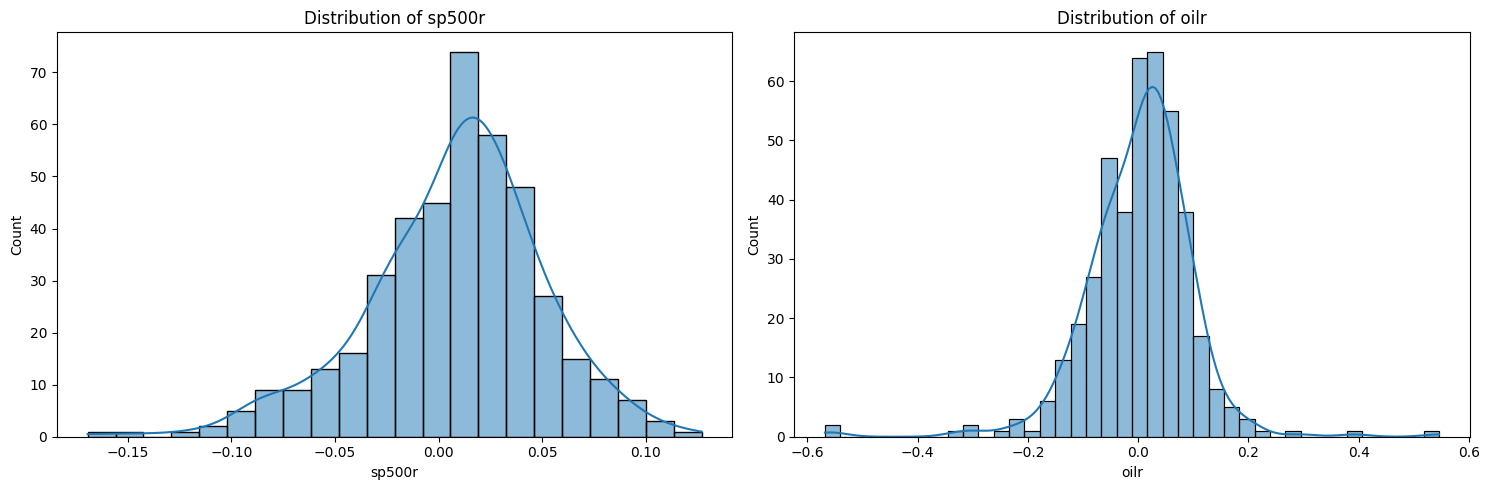

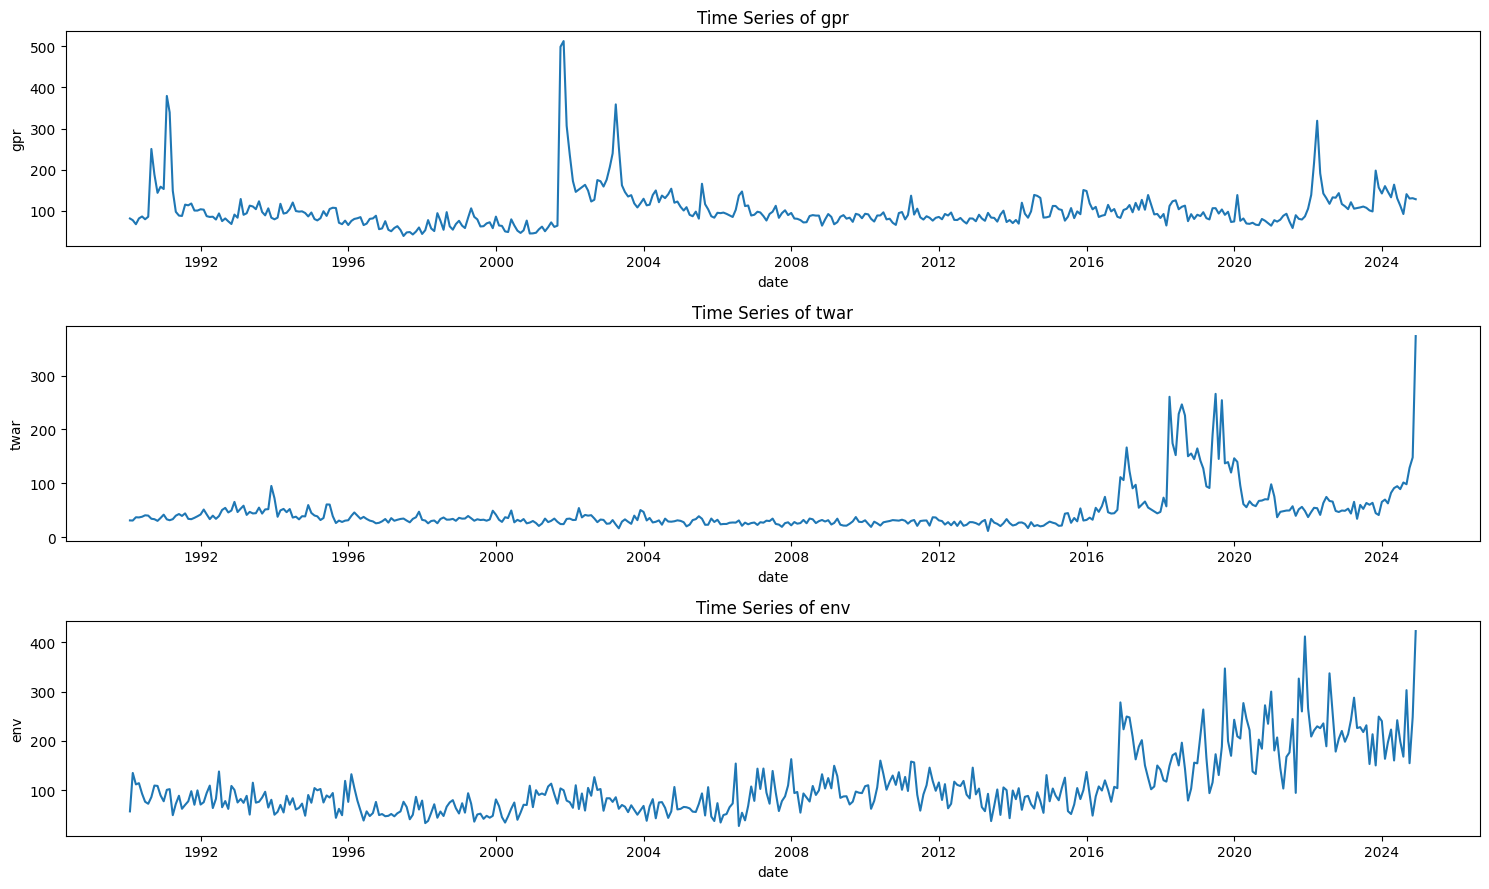


--- GARCH Analysis for sp500r ---
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                 sp500r   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                758.366
Distribution:                  Normal   AIC:                          -1508.73
Method:            Maximum Likelihood   BIC:                          -1492.58
                                        No. Observations:                  419
Date:                Tue, May 20 2025   Df Residuals:                      418
Time:                        15:46:50   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         8.8177e-03  

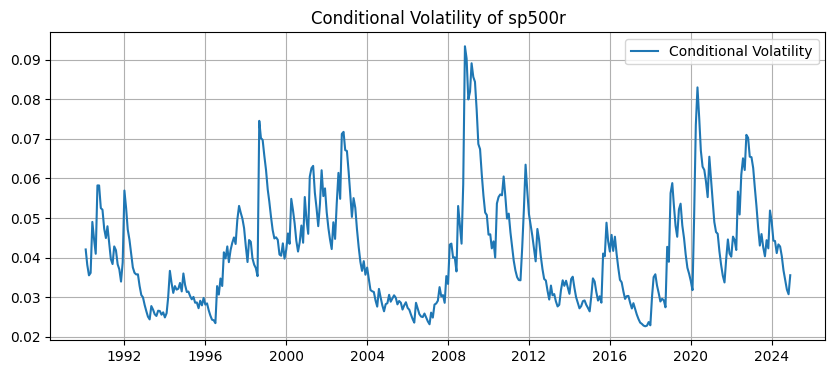


--- GARCH Analysis for oilr ---
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   oilr   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                444.437
Distribution:                  Normal   AIC:                          -880.874
Method:            Maximum Likelihood   BIC:                          -864.722
                                        No. Observations:                  419
Date:                Tue, May 20 2025   Df Residuals:                      418
Time:                        15:46:50   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.9863e-03 

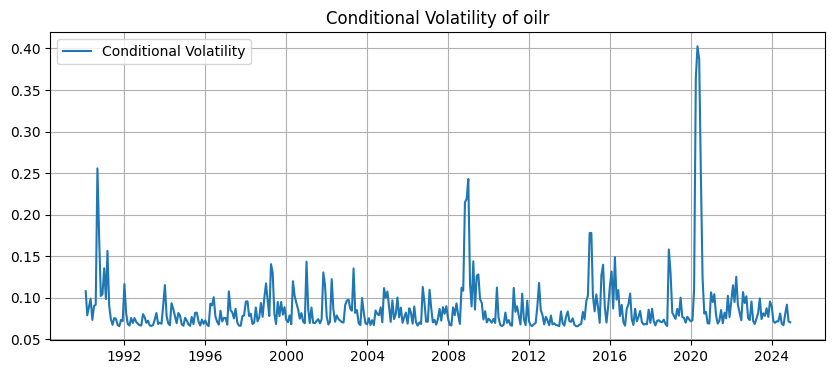


--- Historical VaR and ES ---
sp500r VaR (5%): -0.0718, ES (5%): -0.0962
oilr VaR (5%): -0.1354, ES (5%): -0.2307

--- Regression Analysis: Impact of Risk Factors on Market Returns ---

Regression for sp500r:
                            OLS Regression Results                            
Dep. Variable:                 sp500r   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.4116
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.745
Time:                        15:46:51   Log-Likelihood:                 728.46
No. Observations:                 419   AIC:                            -1449.
Df Residuals:                     415   BIC:                            -1433.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         


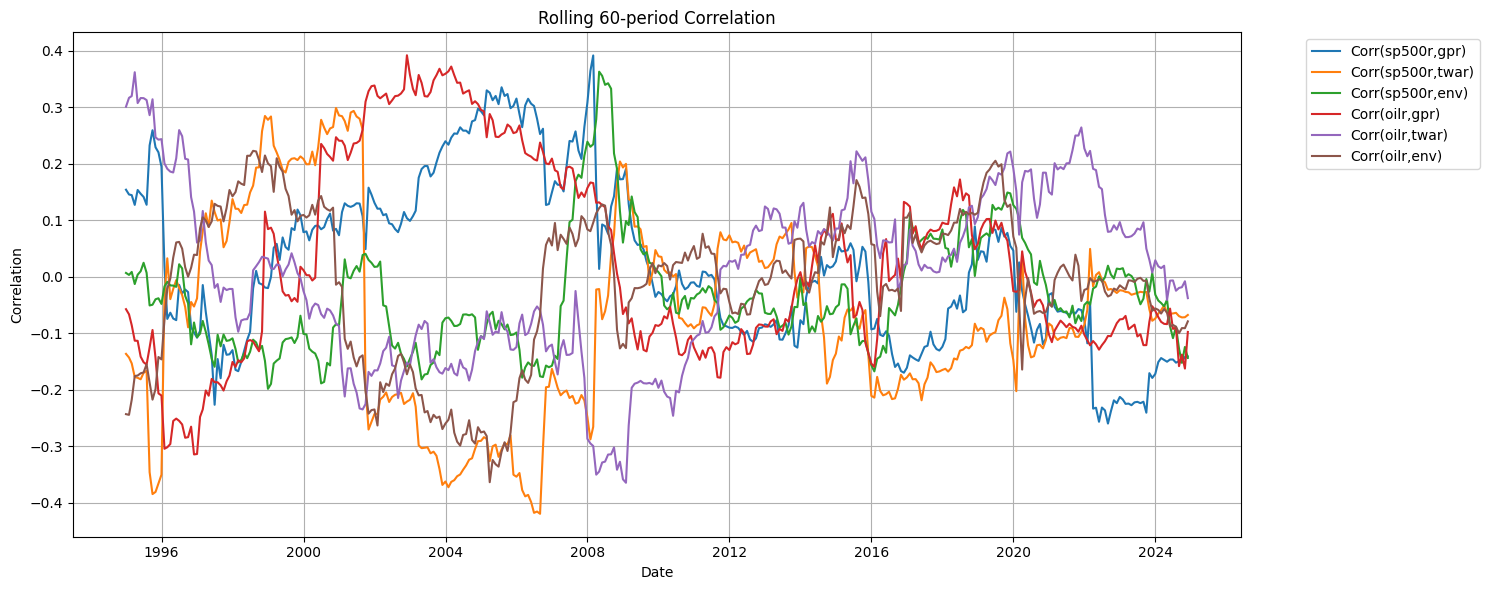

In [38]:

# Select relevant columns
market_returns_cols = ['sp500r', 'oilr']
risk_factor_cols = ['gpr', 'twar', 'env']

try:
    market_returns = df[market_returns_cols].copy().dropna()
    risk_factors = df[risk_factor_cols].copy().dropna()
except KeyError as e:
    print(f"Error: Column '{e}' not found: {e}")
    exit()

# Align the time series
combined_index = market_returns.index.intersection(risk_factors.index)
market_returns = market_returns.loc[combined_index]
risk_factors = risk_factors.loc[combined_index]

# 2. Exploratory Data Analysis of Market Returns and Risk Factors
print("Descriptive Statistics of Market Returns:")
print(market_returns.describe())

print("\nDescriptive Statistics of Risk Factor Changes:")
print(risk_factors.describe())

# Visualize distributions
plt.figure(figsize=(15, 5))
for i, col in enumerate(market_returns.columns):
    plt.subplot(1, 2, i + 1)
    sns.histplot(market_returns[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 9))
for i, col in enumerate(risk_factors.columns):
    plt.subplot(3, 1, i + 1)
    sns.lineplot(x=risk_factors.index, y=risk_factors[col])
    plt.title(f'Time Series of {col}')
plt.tight_layout()
plt.show()

# 3. Volatility Analysis using GARCH
for market in market_returns.columns:
    print(f"\n--- GARCH Analysis for {market} ---")
    model = arch_model(market_returns[market], vol='GARCH', p=1, q=1, dist='normal')
    res = model.fit(disp='off')
    print(res.summary())
    plt.figure(figsize=(10, 4))
    plt.plot(res.conditional_volatility, label='Conditional Volatility')
    plt.title(f'Conditional Volatility of {market}')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4. Value at Risk (VaR) and Expected Shortfall (ES) Estimation
def historical_var_es(returns, alpha=0.05):
    var = np.percentile(returns, 100 * alpha)
    es = returns[returns <= var].mean()
    return var, es

print("\n--- Historical VaR and ES ---")
for market in market_returns.columns:
    var, es = historical_var_es(market_returns[market], alpha=0.05)
    print(f"{market} VaR (5%): {var:.4f}, ES (5%): {es:.4f}")

# 5. Regression Analysis to Quantify Impact
print("\n--- Regression Analysis: Impact of Risk Factors on Market Returns ---")
for market in market_returns.columns:
    X = sm.add_constant(risk_factors)
    y = market_returns[market]
    model = sm.OLS(y, X).fit()
    print(f"\nRegression for {market}:")
    print(model.summary())

# 6. Regime Detection (Simple Threshold-Based)
def detect_regimes(risk_factor, high_threshold, low_threshold):
    regimes = pd.Series(index=risk_factor.index)
    regimes[risk_factor >= high_threshold] = 'High'
    regimes[risk_factor <= low_threshold] = 'Low'
    regimes[(risk_factor > low_threshold) & (risk_factor < high_threshold)] = 'Neutral'
    return regimes

for factor in risk_factors.columns:
    high_thresh = risk_factors[factor].quantile(0.8)
    low_thresh = risk_factors[factor].quantile(0.2)
    regimes = detect_regimes(risk_factors[factor], high_thresh, low_thresh)
    print(f"\nRegimes based on {factor}:")
    print(regimes.value_counts())

    # Analyze market returns in different regimes (Example for Financial Market)
    for market in market_returns.columns:
        print(f"\n{market} returns during {factor} regimes:")
        print(market_returns[market].groupby(regimes).describe())

# 7. Correlation Analysis (Dynamic)
window = 60  # Rolling window for correlation
rolling_corr = pd.concat([market_returns.rolling(window=window).corr(risk_factors[factor])
                          for factor in risk_factors.columns], axis=1)
rolling_corr.columns = [f'Corr({mr},{rf})' for mr in market_returns.columns for rf in risk_factors.columns]

plt.figure(figsize=(15, 6))
for col in rolling_corr.columns:
    plt.plot(rolling_corr.index, rolling_corr[col], label=col)
plt.title(f'Rolling {window}-period Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



       
The study shows that :        
  Market Returns such as :

  - Global financial market :
          - has statistically positive relationship with Geopolitical Risk and environmental shocks , but also tell that this result is unlikely
          - has statistically negative relationship with Trade war tensions , but also tell that this result is unlikely
  - Commodity market :
         - has statistically negative relationship with all risk factors of the study , but also tell that this result is unlikely

The study shows that:
   - In regimes based on geopolitical risk :
        - Global financial returns peak at 9.1% in the high regime, 9.67% in the low regime, and 12.68% in the neutral regime.
        - Commodity Market returns peak at 20.4% in the high regime, 54.58% in the low regime, and 39.18% in the neutral regime.
                     
   - In regimes based on Trade war tension :
        - Global financial returns peak at 12.68% in the high regime, 10.77% in the low regime, and 11.15% in the neutral regime.
        - Commodity Market returns peak at 54.58% in the high regime, 20.41% in the low regime, and 39.18% in the neutral regime.                      

   - In regimes based on Environment Shock :
        - Global financial returns peak at 12.68% in the high regime, 9.67% in the low regime, and 11.15% in the neutral regime.
        - Commodity Market returns peak at 54.58% in the high regime, 21.36% in the low regime, and 39.18% in the neutral regime.                      

Also its shows that over the time ,  risk factors and market returns fluctuate between positive and negative relationships
